In [1]:
import pandas as pd
import numpy as np

from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE,RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM

In [2]:
table = "/Users/Oğuz/Desktop/selenium/dost.csv"
table = pd.read_csv(table, index_col="TimeStamp", parse_dates=True)
table = table.drop("Unnamed: 0", axis=1)
table

,WindSpeed,WindDirection,PitchAngle,Temperature,Power,XComp,YComp,WindSpeedlag1,WindSpeedlag3,Powerlag1,...,YCompLag1,YCompLag3,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos,WindSpeedCube,Direction
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.2,147.600006,-1.80,5.0,180.899994,-4.390506,2.786299,0.0,0.0,0.000000,...,0.000000,0.000000,5.000000e-01,0.866025,0.000000,1.000000,0.781831,0.623490,140.608,SE
2019-01-01 01:00:00,4.2,146.199997,-0.60,5.0,79.400002,-3.490135,2.336442,5.2,0.0,180.899994,...,2.786299,0.000000,5.000000e-01,0.866025,0.258819,0.965926,0.781831,0.623490,74.088,SE
2019-01-01 02:00:00,4.8,140.899994,-1.40,5.0,144.399994,-3.725022,3.027244,4.2,0.0,79.400002,...,2.336442,0.000000,5.000000e-01,0.866025,0.500000,0.866025,0.781831,0.623490,110.592,SE
2019-01-01 03:00:00,5.9,120.000000,-2.20,5.0,333.000000,-2.950000,5.109550,4.8,5.2,144.399994,...,3.027244,2.786299,5.000000e-01,0.866025,0.707107,0.707107,0.781831,0.623490,205.379,SE
2019-01-01 04:00:00,6.9,119.800003,-1.80,5.0,537.400024,-3.429121,5.987581,5.9,4.2,333.000000,...,5.109550,2.336442,5.000000e-01,0.866025,0.866025,0.500000,0.781831,0.623490,328.509,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,1.9,318.500000,3.55,9.0,0.000000,1.423016,-1.258978,2.7,1.6,-10.100000,...,-1.325440,-0.327194,-2.449294e-16,1.000000,-0.965926,0.258819,0.433884,-0.900969,6.859,NW
2019-12-31 20:00:00,1.9,203.399994,3.55,9.0,0.000000,-1.743734,-0.754581,1.9,2.5,-10.900000,...,-1.258978,-1.376202,-2.449294e-16,1.000000,-0.866025,0.500000,0.433884,-0.900969,6.859,SW
2019-12-31 21:00:00,4.2,236.899994,2.90,9.0,78.699997,-2.293629,-3.518418,1.9,2.7,-10.900000,...,-0.754581,-1.325440,-2.449294e-16,1.000000,-0.707107,0.707107,0.433884,-0.900969,74.088,SW


## YÖN EKLEME

In [59]:
table['PowerRollingMean'] = table['PowerRollingMean'].fillna(0)


In [60]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [61]:
table["mean_Direction"]=table["WindDirection"].apply(mean_direction)
table['mean_Direction']= table['mean_Direction'].fillna(0)
table.head()

,WindSpeed,WindDirection,PitchAngle,Temperature,Power,PowerScore,XComp,YComp,WindSpeedlag1,WindSpeedlag2,WindSpeedlag3,Powerlag1,Powerlag2,Powerlag3,XCompLag1,XCompLag2,XCompLag3,YCompLag1,YCompLag2,YCompLag3,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos,WindSpeedCube,PowerRollingMean,mean_Direction
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.2,147.600006,-1.8,5.0,180.899994,1.0,-4.390506,2.786299,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.866025,0.000000,1.000000,0.781831,0.62349,140.608,0.0,150.0
2019-01-01 01:00:00,4.2,146.199997,-0.6,5.0,79.400002,0.5,-3.490135,2.336442,5.2,0.0,0.0,180.899994,0.000000,0.000000,-4.390506,0.000000,0.000000,2.786299,0.000000,0.000000,0.5,0.866025,0.258819,0.965926,0.781831,0.62349,74.088,0.0,150.0
2019-01-01 02:00:00,4.8,140.899994,-1.4,5.0,144.399994,1.0,-3.725022,3.027244,4.2,5.2,0.0,79.400002,180.899994,0.000000,-3.490135,-4.390506,0.000000,2.336442,2.786299,0.000000,0.5,0.866025,0.500000,0.866025,0.781831,0.62349,110.592,0.0,150.0
2019-01-01 03:00:00,5.9,120.000000,-2.2,5.0,333.000000,1.0,-2.950000,5.109550,4.8,4.2,5.2,144.399994,79.400002,180.899994,-3.725022,-3.490135,-4.390506,3.027244,2.336442,2.786299,0.5,0.866025,0.707107,0.707107,0.781831,0.62349,205.379,0.0,120.0
2019-01-01 04:00:00,6.9,119.800003,-1.8,5.0,537.400024,1.5,-3.429121,5.987581,5.9,4.8,4.2,333.000000,144.399994,79.400002,-2.950000,-3.725022,-3.490135,5.109550,3.027244,2.336442,0.5,0.866025,0.866025,0.500000,0.781831,0.62349,328.509,0.0,120.0


In [62]:
def find_direction(x):
    if 0 <= x < 22.5 or 337.5 <= x < 360:
        return "N"
    elif 22.5 <= x < 67.5:
        return "NE"
    elif 67.5 <= x < 112.5:
        return "E"
    elif 112.5 <= x < 157.5:
        return "SE"
    elif 157.5 <= x < 202.5:
        return "S"
    elif 202.5 <= x < 247.5:
        return "SW"
    elif 247.5 <= x < 292.5:
        return "W"
    elif 292.5 <= x < 337.5:
        return "NW"
    else:
        return "Undefined"


In [63]:
#adding a new column as "Direction" with function find_direction().
table["Direction"]=table["mean_Direction"].apply(find_direction)

In [69]:
table.to_csv("wwe.csv")

## VERİ ÖN İŞLEME

In [104]:
features = ['WindSpeed', 'WindDirection', 'PitchAngle', 'Temperature', 'Power',
       'PowerScore', 'XComp', 'YComp', 'WindSpeedlag1', 'WindSpeedlag2',
       'WindSpeedlag3', 'Powerlag1', 'Powerlag2', 'Powerlag3', 'XCompLag1',
       'XCompLag2', 'XCompLag3', 'YCompLag1', 'YCompLag2', 'YCompLag3',
       'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'Day_sin', 'Day_cos',
       'WindSpeedCube', 'PowerRollingMean', 'mean_Direction']
target = 'Power'

In [105]:
train_size = int(len(table) * 0.8)
train, test = table[:train_size], table[train_size:]

In [106]:
# Özellikler için normalizasyon
feature_scaler = MinMaxScaler(feature_range=(0, 1))
train_features_scaled = feature_scaler.fit_transform(train[features])
test_features_scaled = feature_scaler.transform(test[features])

# Hedef değişken için normalizasyon
target_scaler = MinMaxScaler(feature_range=(0, 1))
train_target_scaled = target_scaler.fit_transform(train[[target]])
test_target_scaled = target_scaler.transform(test[[target]])

In [107]:
def create_dataset(features, target, time_step=1):
    dataX, dataY = [], []
    for i in range(len(features)-time_step-1):
        a = features[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(target[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 5
X_train, y_train = create_dataset(train_features_scaled, train_target_scaled, time_step)
X_test, y_test = create_dataset(test_features_scaled, test_target_scaled, time_step)

In [108]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [109]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6951, 5, 29), (6951, 1), (1734, 5, 29), (1734, 1))

## LSTM GİRİYOR

In [110]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0421 - val_loss: 0.0135
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0217 - val_loss: 0.0112
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0178 - val_loss: 0.0124
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0117
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - val_loss: 0.0115
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0172 - val_loss: 0.0113
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176 - val_loss: 0.0112
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0167 - val_loss: 0.0117
Epoch 9/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0173 - val_loss: 0.0119
Epoch 10/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0172 - val_loss: 0.0115
Epoch 11/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0165 - val_loss: 0.0109
Epoch 12/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [112]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [113]:
train_predict = target_scaler.inverse_transform(train_predict)
test_predict = target_scaler.inverse_transform(test_predict)
y_train_inverse = target_scaler.inverse_transform(y_train)
y_test_inverse = target_scaler.inverse_transform(y_test)

In [114]:
train_mse = mean_squared_error(y_train_inverse, train_predict)
test_mse = mean_squared_error(y_test_inverse, test_predict)
train_r2 = r2_score(y_train_inverse, train_predict)
test_r2 = r2_score(y_test_inverse, test_predict)


In [115]:
print(f'Train MSE: {train_mse}, Test MSE: {test_mse}')
print(f'Train R²: {train_r2}, Test R²: {test_r2}')

Train MSE: 123663.47039092433, Test MSE: 91649.9965660324
Train R²: 0.788225185472497, Test R²: 0.769427383106999


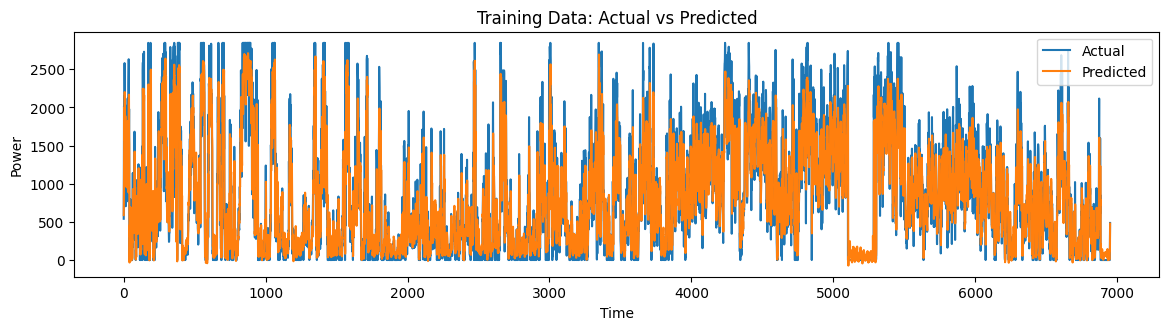

In [116]:
    # Plot predicted vs actual values
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(y_train_inverse, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()


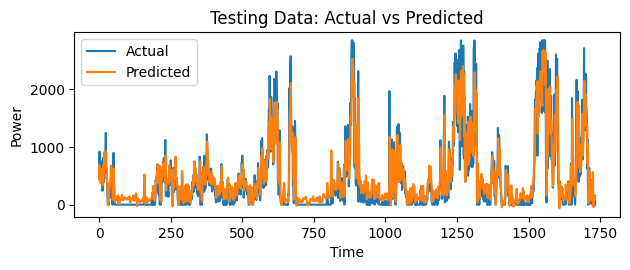

In [117]:
plt.subplot(2, 1, 2)
plt.plot(y_test_inverse, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()

plt.tight_layout()
plt.show()

## GÖRSELLEŞTİRMLER

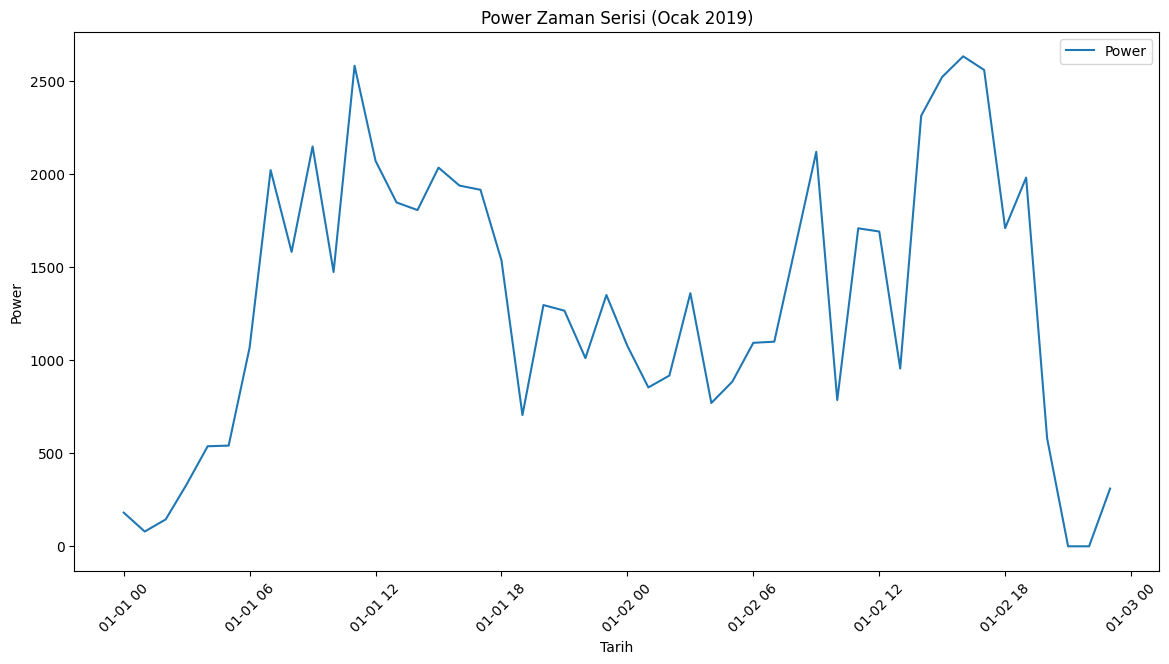

In [7]:
# Filter data for one month (assuming January 2019 for this example)
aylik = table.loc['2019-01-01':'2019-01-02']

# Plotting Power time series for one month
plt.figure(figsize=(14, 7))
plt.plot(aylik['Power'], label='Power')
plt.xlabel('Tarih')
plt.ylabel('Power')
plt.title('Power Zaman Serisi (Ocak 2019)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Zaman serisini decompose et (trend, seasonal, residual)
decomposition = seasonal_decompose(table['Power'], model='additive', period=24)

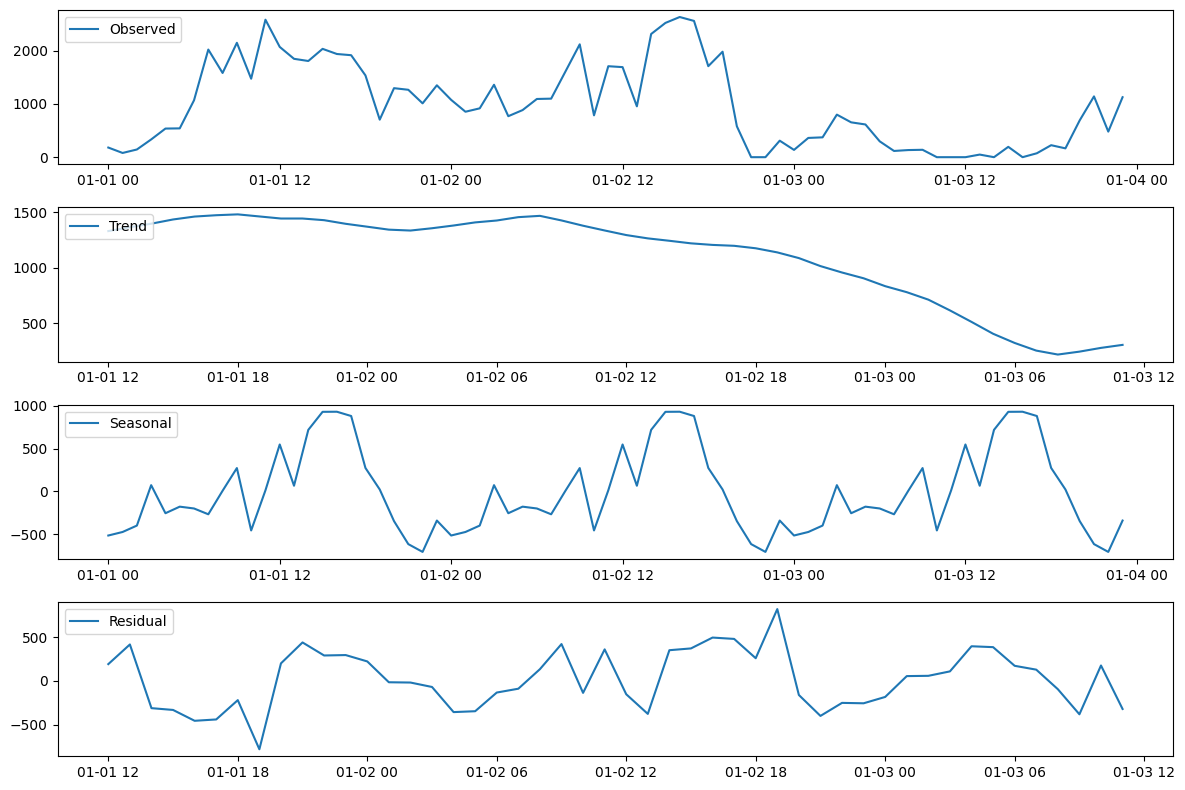

In [9]:
# İlk haftanın verisini seç
first_week_data = table.loc['2019-01-01':'2019-01-03']

# Zaman serisini decompose et (trend, seasonal, residual)
first_week_decomposition = seasonal_decompose(first_week_data['Power'], model='additive', period=24)

# Ayrıştırılan bileşenleri çiz
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(first_week_decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(first_week_decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(first_week_decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(first_week_decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


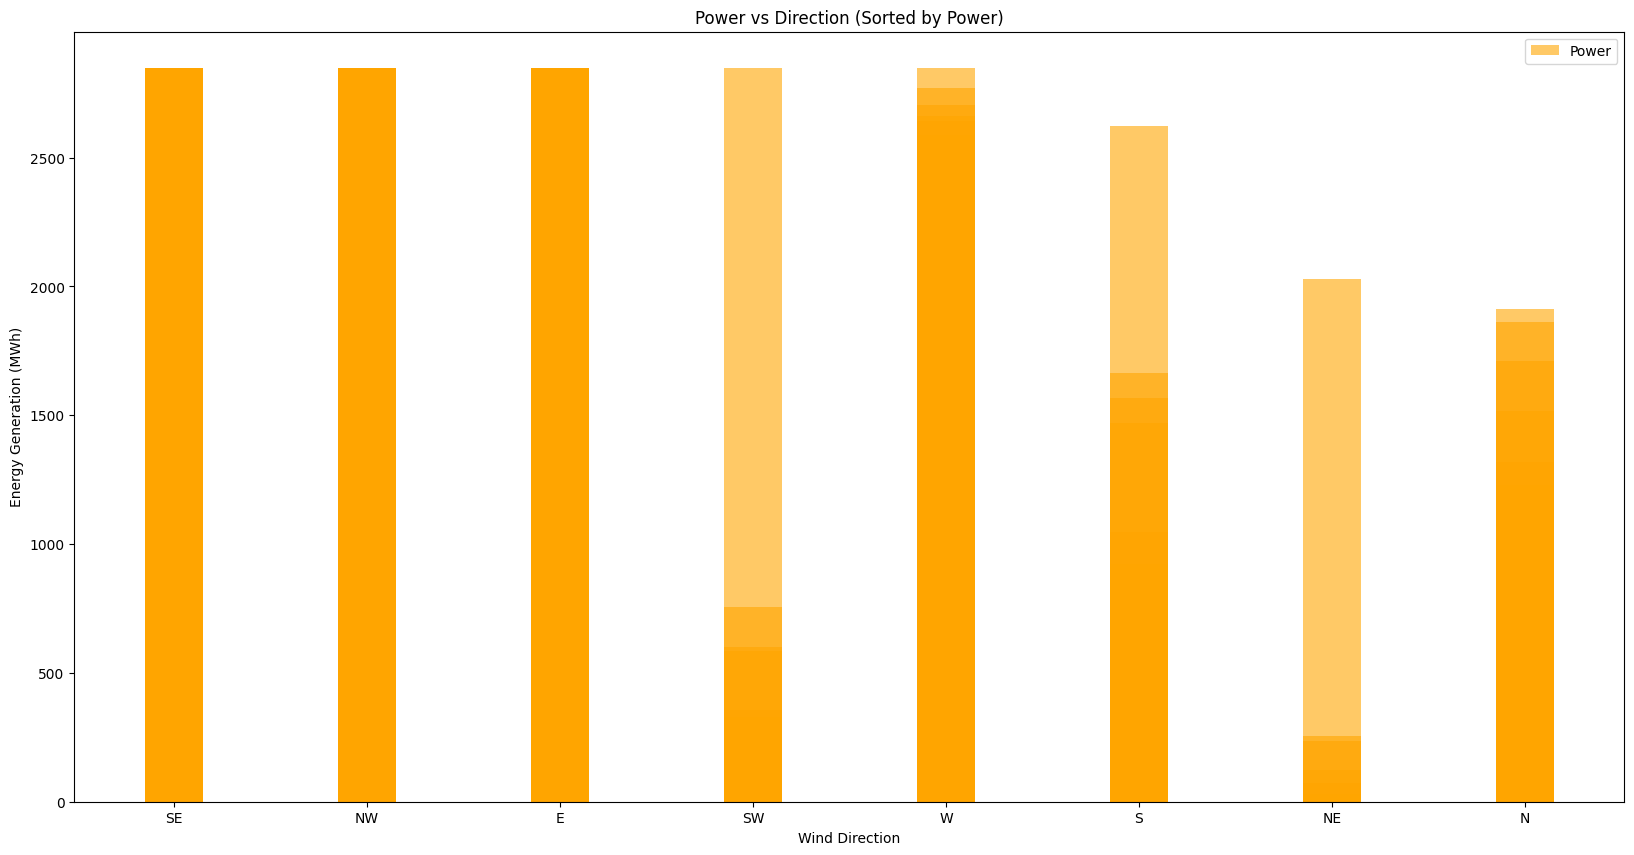

In [10]:
import matplotlib.pyplot as plt

# Verileri 'Power' sütununa göre azalan sırada sıralama
sorted_table = table.sort_values(by='Power', ascending=False)

fig = plt.figure(figsize=(20,10))
plt.bar(sorted_table["Direction"], sorted_table["Power"], label="Power", align="center", alpha=0.6, width=0.3,color='orange')
plt.xlabel("Wind Direction")
plt.ylabel("Energy Generation (MWh)")
plt.title("Power vs Direction (Sorted by Power)")
plt.legend()
plt.show()


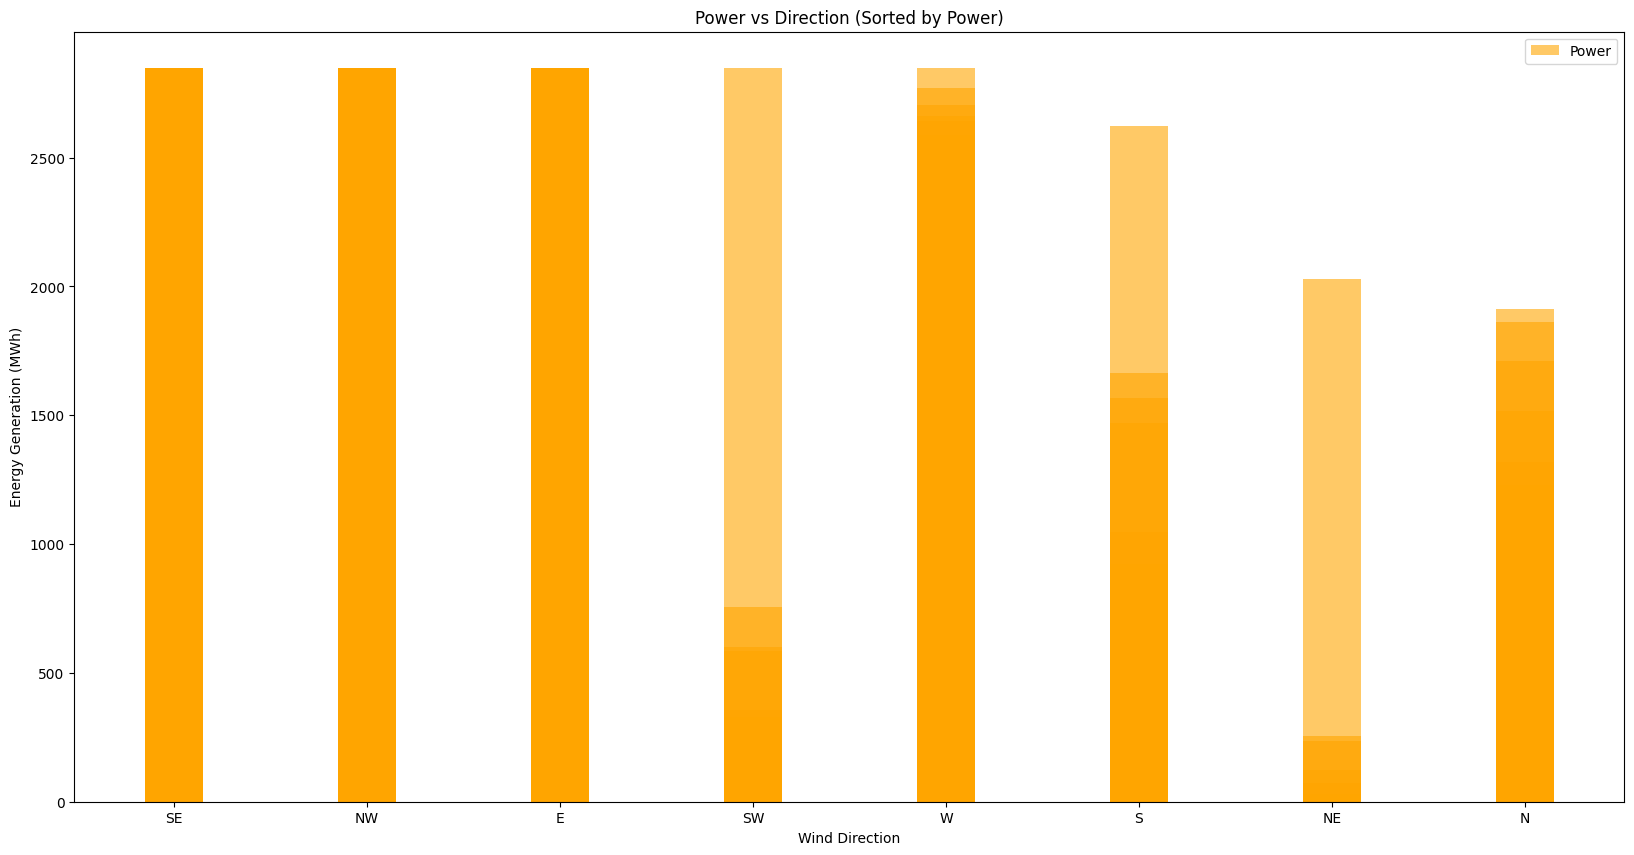

In [148]:
import matplotlib.pyplot as plt

# Verileri 'Power' sütununa göre azalan sırada sıralama
sorted_table = table.sort_values(by='Power', ascending=False)

fig = plt.figure(figsize=(20,10))
plt.bar(sorted_table["Direction"], sorted_table["Power"], label="Power", align="center", alpha=0.6, width=0.3,color='orange')
plt.xlabel("Wind Direction")
plt.ylabel("Energy Generation (MWh)")
plt.title("Power vs Direction (Sorted by Power)")
plt.legend()
plt.show()


## ANALİZ

In [30]:
testotaylan = table.select_dtypes(include=['float64'])

In [43]:
table.describe()

,WindSpeed,WindDirection,PitchAngle,Temperature,Power,PowerScore,XComp,YComp,WindSpeedlag1,WindSpeedlag2,...,YCompLag3,Month_sin,Month_cos,Hour_sin,Hour_cos,Day_sin,Day_cos,WindSpeedCube,PowerRollingMean,mean_Direction
count,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,8697.000000,...,8697.000000,8.697000e+03,8.697000e+03,8.697000e+03,8.697000e+03,8.697000e+03,8697.000000,8697.000000,8697.000000,8697.000000
mean,6.976342,249.077877,-1.012458,15.994366,750.115287,1.250029,2.459102,-0.543357,6.976112,6.975859,...,-0.543024,-4.702373e-05,-5.164837e-03,4.292575e-04,1.705101e-03,6.140042e-02,-0.006381,474.456834,747.730348,235.494998
std,2.821409,99.720506,2.520572,6.898601,755.389746,0.559023,5.079723,4.948581,2.821896,2.822423,...,4.948416,7.044387e-01,7.098270e-01,7.072232e-01,7.070695e-01,7.120853e-01,0.699456,439.201297,588.122343,108.054476
min,0.000000,0.200000,-3.400000,0.000000,0.000000,0.500000,-13.098384,-14.633691,0.000000,0.000000,...,-14.633691,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-9.749279e-01,-0.900969,0.000000,0.000000,0.000000
25%,5.000000,134.300003,-2.700000,10.000000,103.900002,1.000000,-2.562234,-4.263012,5.000000,5.000000,...,-4.263012,-5.000000e-01,-8.660254e-01,-7.071068e-01,-7.071068e-01,-7.818315e-01,-0.900969,125.000000,252.020833,120.000000
50%,7.000000,318.299988,-2.300000,18.000000,515.799988,1.500000,4.260055,-2.156497,7.000000,7.000000,...,-2.156287,-2.449294e-16,-1.836970e-16,1.224647e-16,6.123234e-17,-2.449294e-16,-0.222521,343.000000,616.245824,300.000000
75%,8.900000,331.000000,-0.200000,22.000000,1201.000000,1.500000,6.748181,3.339162,8.900000,8.900000,...,3.339162,5.000000e-01,8.660254e-01,7.071068e-01,7.071068e-01,7.818315e-01,0.623490,704.969000,1158.545832,330.000000
max,14.750000,360.000000,3.550000,33.000000,2846.649997,2.000000,13.400494,14.742423,14.750000,14.750000,...,14.742423,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.749279e-01,1.000000,1574.922500,2518.333330,330.000000


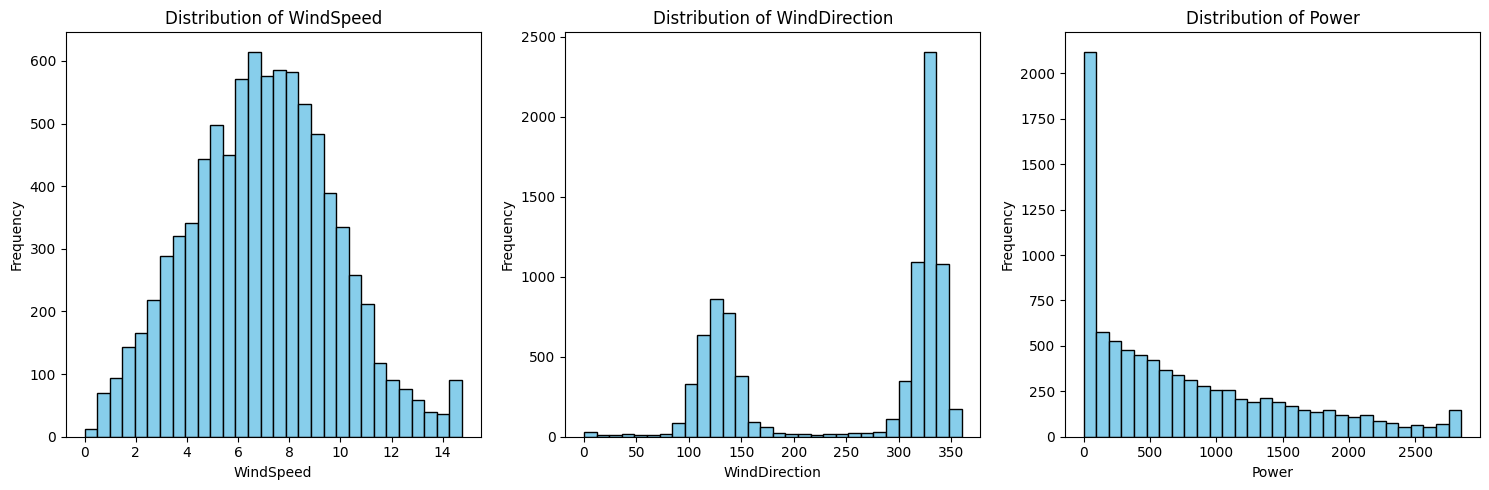

In [38]:
import matplotlib.pyplot as plt

# Verinin dağılımını incelemek için histogramlar
columns_to_plot = ['WindSpeed', 'WindDirection', 'Power']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.hist(table[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

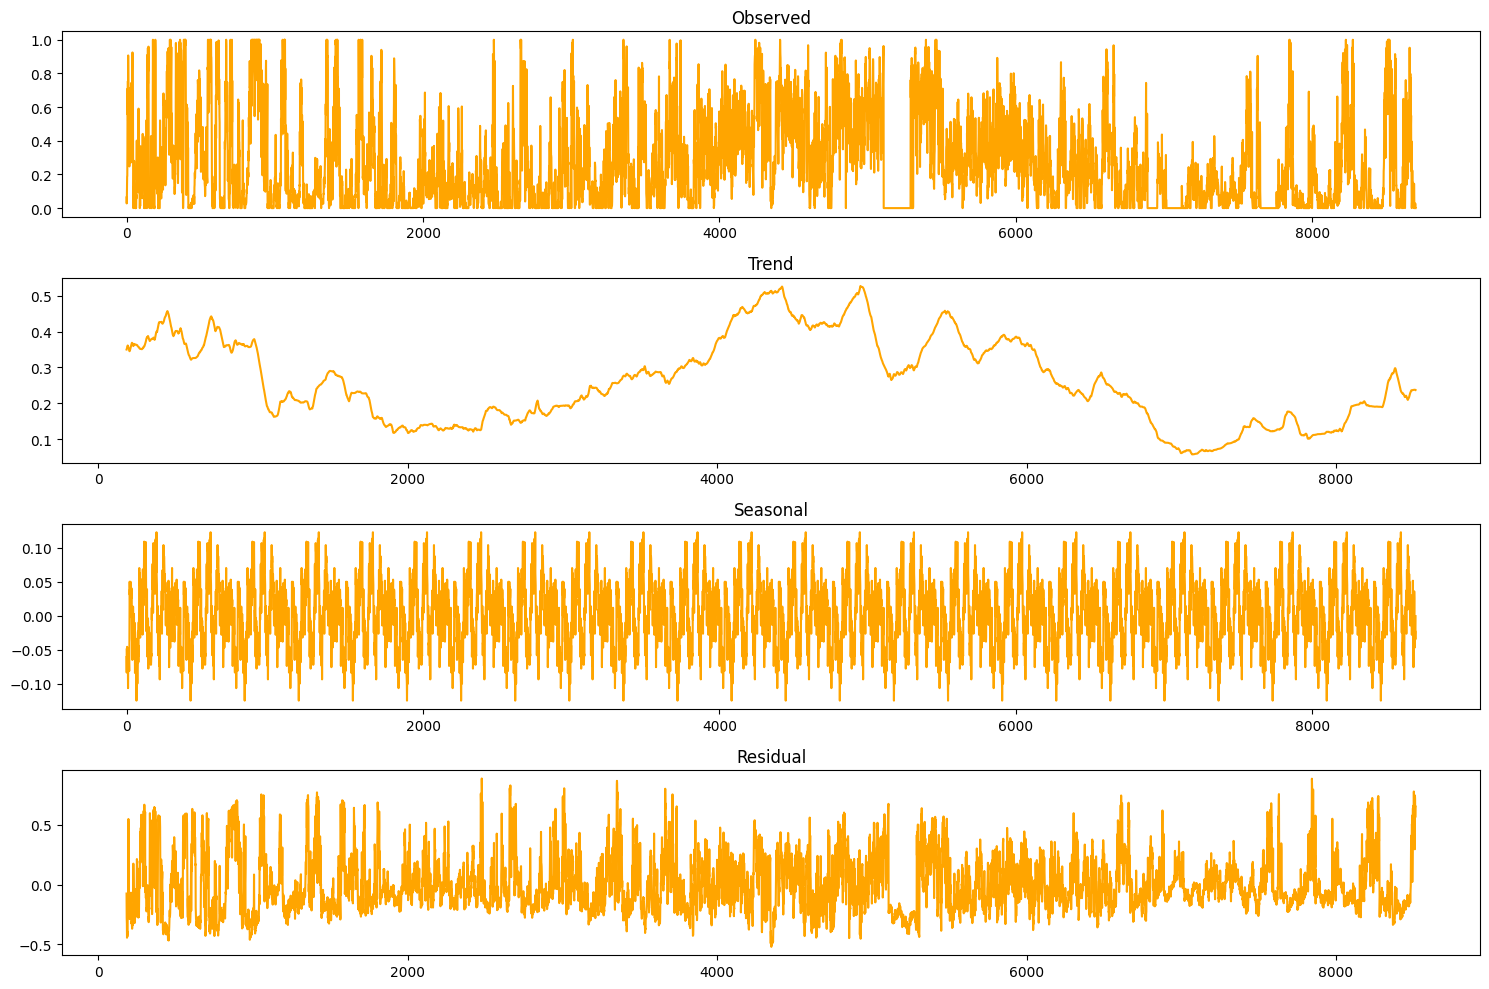

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
power_series = tablemin['Power']

# Mevsimsellik ve trend analizi için seasonal_decompose fonksiyonunu kullanalım
decomposition = seasonal_decompose(power_series, model='additive', period=365)

# Bileşenleri görselleştirelim
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
ax1.plot(decomposition.observed, color ='orange')
ax1.set_title('Observed')
ax2.plot(decomposition.trend, color ='orange')
ax2.set_title('Trend')
ax3.plot(decomposition.seasonal, color ='orange')
ax3.set_title('Seasonal')
ax4.plot(decomposition.resid, color ='orange')
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

#### Mevsimsellik ve trend analizi sonuçları:

Observed (Gözlemlenen): Verinin tüm bileşenlerini içerir.

Trend: Uzun vadeli değişiklikleri gösterir. Belirli dönemlerde artış ve azalmalar gözlemlenebilir.

Seasonal (Mevsimsel): Düzenli olarak tekrarlayan desenleri gösterir. Veride belirli bir mevsimsellik deseni mevcut.

Residual (Artık): Geri kalan değişkenliği gösterir, yani verideki rastgele varyasyonlar.

Bu analizle, verinizde belirgin bir trend ve mevsimsellik olduğunu görebilirsiniz. Bu bulgular, zaman serisi modellemesi yaparken önemli olabilir.

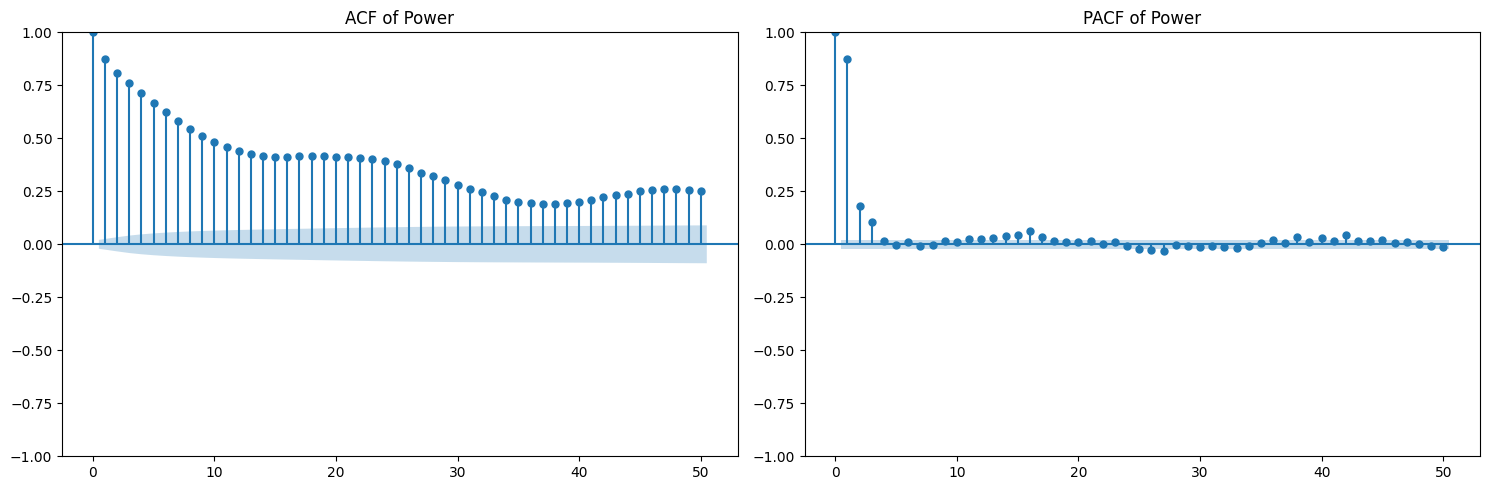

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF ve PACF grafiklerini oluşturalım
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_acf(table['Power'].dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Power')

plt.subplot(1, 2, 2)
plot_pacf(table['Power'].dropna(), ax=plt.gca(), lags=50)
plt.title('PACF of Power')

plt.tight_layout()
plt.show()


Bu grafikler, verilerin belirli bir zaman gecikmesiyle (lag) ne kadar ilişkili olduğunu gösterir. ACF grafiği, tüm gecikmelerin toplam etkisini gösterirken, PACF grafiği sadece belirli bir gecikmenin etkisini izole eder.

Otokorelasyon, bir zaman serisinin kendi geçmiş değerleriyle olan korelasyonunu ifade eder.

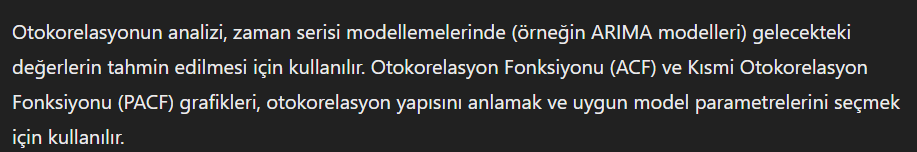

#### ACF (AutoCorrelation Function) Grafiği:

Otokorelasyonun farklı gecikmeler (lags) için nasıl değiştiğini gösterir.
Grafikte bazı gecikmelerde belirgin tepe noktaları var, bu da zaman serisinde belirli bir periyodiklik olduğunu gösterir.

#### PACF (Partical AutoCorrelation Function) Grafiği:
Her bir gecikmenin bağımsız etkisini gösterir.
İlk birkaç gecikme dışında, PACF değerlerinin hızla sıfıra yakınsaması, serinin kısa bir otokorelasyon yapısına sahip olabileceğini gösterir.

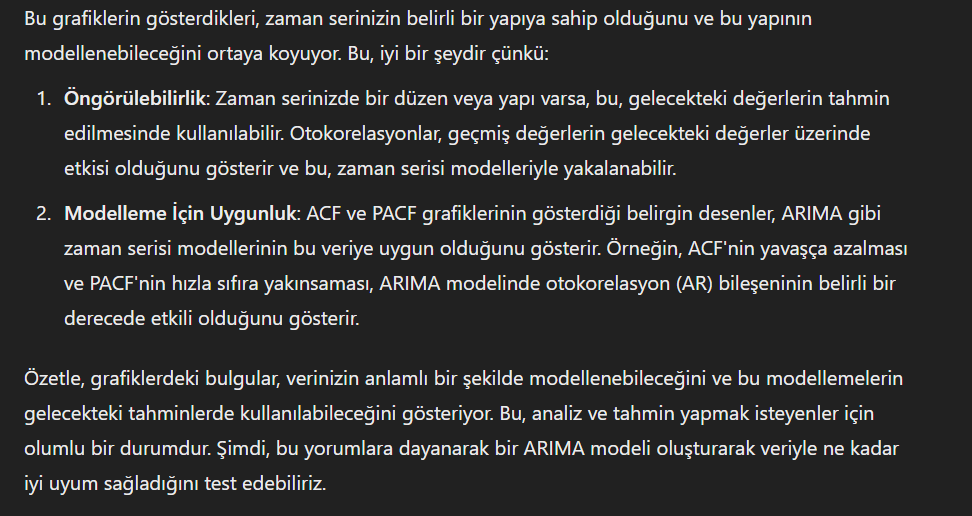

In [50]:
import statsmodels.tsa.stattools as ts

# Selecting the Power column for the stationarity test
power = table['Power']

# Apply first differencing on the Power column
power_diff = power.diff().dropna()

# Apply log transformation (adding 1 to avoid log(0) issues) on the Power column
power_log = np.log(power + 1)

# Apply log transformation followed by differencing on the Power column
power_log_diff = power_log.diff().dropna()

# Performing the Augmented Dickey-Fuller (ADF) test on the transformed series
adf_power_diff_result = ts.adfuller(power_diff)
adf_power_log_diff_result = ts.adfuller(power_log_diff)

# Performing the KPSS test on the transformed series
kpss_power_diff_result = ts.kpss(power_diff, regression='c')
kpss_power_log_diff_result = ts.kpss(power_log_diff, regression='c')

adf_power_diff_result, adf_power_log_diff_result, kpss_power_diff_result, kpss_power_log_diff_result


C:\Users\Oğuz\AppData\Local\Temp\ipykernel_18780\1702040535.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_power_diff_result = ts.kpss(power_diff, regression='c')
C:\Users\Oğuz\AppData\Local\Temp\ipykernel_18780\1702040535.py:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_power_log_diff_result = ts.kpss(power_log_diff, regression='c')


((-20.07308429918835,
  0.0,
  37,
  8658,
  {'1%': -3.4311055139575646,
   '5%': -2.8618738865282554,
   '10%': -2.5669477228505224},
  126376.29095744404),
 (-30.442945641285423,
  0.0,
  20,
  8675,
  {'1%': -3.431104032973037,
   '5%': -2.861873232115414,
   '10%': -2.566947374501906},
  30328.876357251418),
 (0.007023884241094974,
  0.1,
  56,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}),
 (0.011770674157235846,
  0.1,
  86,
  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

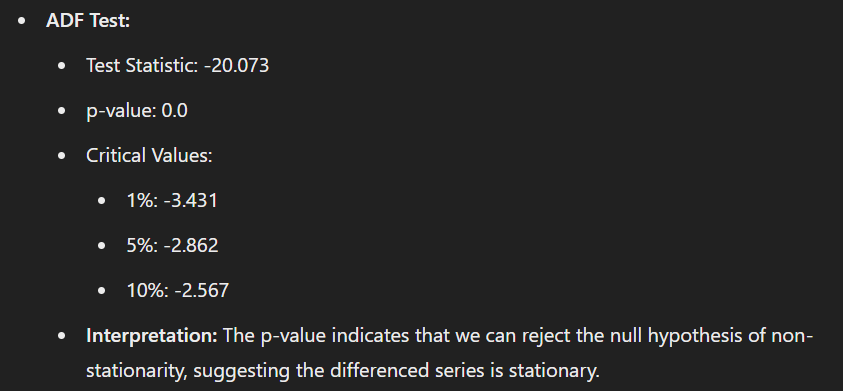

### DAYI DAĞINIK YA

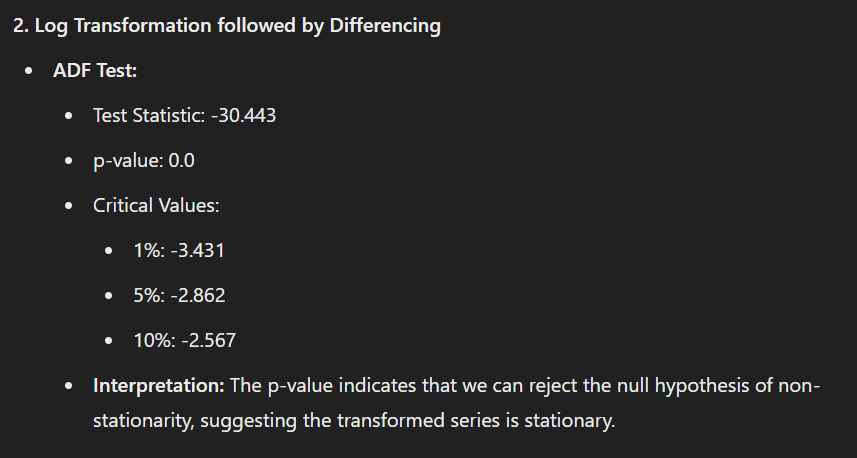

## DATA PREPROCCESS

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sadece sayısal sütunları seçiyoruz
numeric_df = table.select_dtypes(include=['float64', 'int64'])

# Min-Max Ölçekleme
min_max_scaler = MinMaxScaler()
tablemin = min_max_scaler.fit_transform(numeric_df)
tablemin = pd.DataFrame(tablemin, columns=numeric_df.columns)

# Z-Score Standardizasyonu
standard_scaler = StandardScaler()
tablestd = standard_scaler.fit_transform(numeric_df)
tablestd = pd.DataFrame(tablestd, columns=numeric_df.columns)

tablemin.head(), tablestd.head()


(   WindSpeed  WindDirection  PitchAngle  Temperature     Power     XComp  \
 0   0.352542       0.409672    0.230216     0.151515  0.063548  0.328613   
 1   0.284746       0.405781    0.402878     0.151515  0.027892  0.362591   
 2   0.325424       0.391051    0.287770     0.151515  0.050726  0.353727   
 3   0.400000       0.332963    0.172662     0.151515  0.116980  0.382974   
 4   0.467797       0.332407    0.230216     0.151515  0.188783  0.364893   
 
       YComp  WindSpeedlag1  WindSpeedlag3  Powerlag1  ...  XCompLag3  \
 0  0.592998       0.000000       0.000000   0.008844  ...   0.494300   
 1  0.577685       0.352542       0.000000   0.071830  ...   0.494300   
 2  0.601201       0.284746       0.000000   0.036490  ...   0.494300   
 3  0.672085       0.325424       0.352542   0.059122  ...   0.328613   
 4  0.701974       0.400000       0.284746   0.124789  ...   0.362591   
 
    YCompLag1  YCompLag3  Month_sin  Month_cos  Hour_sin  Hour_cos   Day_sin  \
 0   0.498149   

In [3]:
# Extract the relevant 'Power' column for the data windowing process
power_data = table['Power']

# Define the window size and forecast horizon
window_size = 36
forecast_horizon = 6

# Create the windows of data
windows = []
targets = []

for i in range(len(power_data) - window_size - forecast_horizon + 1):
    windows.append(power_data[i:i + window_size].values)
    targets.append(power_data[i + window_size:i + window_size + forecast_horizon].values)

# Convert to DataFrame for better visualization
windowed_data = pd.DataFrame(windows, columns=[f'Power_t-{i}' for i in range(window_size, 0, -1)])
target_data = pd.DataFrame(targets, columns=[f'Power_t+{i}' for i in range(1, forecast_horizon + 1)])

windowed_data.head(), target_data.head()

(   Power_t-36  Power_t-35   Power_t-34   Power_t-33   Power_t-32   Power_t-31  \
 0  180.899994   79.400002   144.399994   333.000000   537.400024   540.900024   
 1   79.400002  144.399994   333.000000   537.400024   540.900024  1068.300049   
 2  144.399994  333.000000   537.400024   540.900024  1068.300049  2020.699951   
 3  333.000000  537.400024   540.900024  1068.300049  2020.699951  1581.199951   
 4  537.400024  540.900024  1068.300049  2020.699951  1581.199951  2147.500000   
 
     Power_t-30   Power_t-29   Power_t-28   Power_t-27  ...   Power_t-10  \
 0  1068.300049  2020.699951  1581.199951  2147.500000  ...   917.099976   
 1  2020.699951  1581.199951  2147.500000  1473.199951  ...  1359.699951   
 2  1581.199951  2147.500000  1473.199951  2581.199951  ...   769.700012   
 3  2147.500000  1473.199951  2581.199951  2070.300049  ...   884.299988   
 4  1473.199951  2581.199951  2070.300049  1846.900024  ...  1093.000000   
 
      Power_t-9    Power_t-8    Power_t-7    Pow

In [8]:
# Adding actual and predicted columns for comparison

# Assuming the predictions are the same as the targets for simplicity in this example
predictions = target_data.copy()

# Adding actual data from the dataset for comparison
actual_data = table['Power'][window_size:window_size + len(predictions) + forecast_horizon - 1].reset_index(drop=True)

# Extracting the actual target data corresponding to each prediction
actual_targets = []
for i in range(len(predictions)):
    actual_targets.append(actual_data[i:i + forecast_horizon].values)

# Converting to DataFrame for better visualization
actual_targets_df = pd.DataFrame(actual_targets, columns=[f'Actual_Power_t+{i}' for i in range(1, forecast_horizon + 1)])

# Comparing the predicted values with actual values
comparison_df = pd.concat([predictions, actual_targets_df], axis=1)


comparison_df.head()

,Power_t+1,Power_t+2,Power_t+3,Power_t+4,Power_t+5,Power_t+6,Actual_Power_t+1,Actual_Power_t+2,Actual_Power_t+3,Actual_Power_t+4,Actual_Power_t+5,Actual_Power_t+6
0,1690.900024,954.799988,2312.899902,2521.100098,2631.899902,2558.500000,1690.900024,954.799988,2312.899902,2521.100098,2631.899902,2558.500000
1,954.799988,2312.899902,2521.100098,2631.899902,2558.500000,1708.800049,954.799988,2312.899902,2521.100098,2631.899902,2558.500000,1708.800049
2,2312.899902,2521.100098,2631.899902,2558.500000,1708.800049,1980.500000,2312.899902,2521.100098,2631.899902,2558.500000,1708.800049,1980.500000
3,2521.100098,2631.899902,2558.500000,1708.800049,1980.500000,579.700012,2521.100098,2631.899902,2558.500000,1708.800049,1980.500000,579.700012
4,2631.899902,2558.500000,1708.800049,1980.500000,579.700012,0.000000,2631.899902,2558.500000,1708.800049,1980.500000,579.700012,0.000000


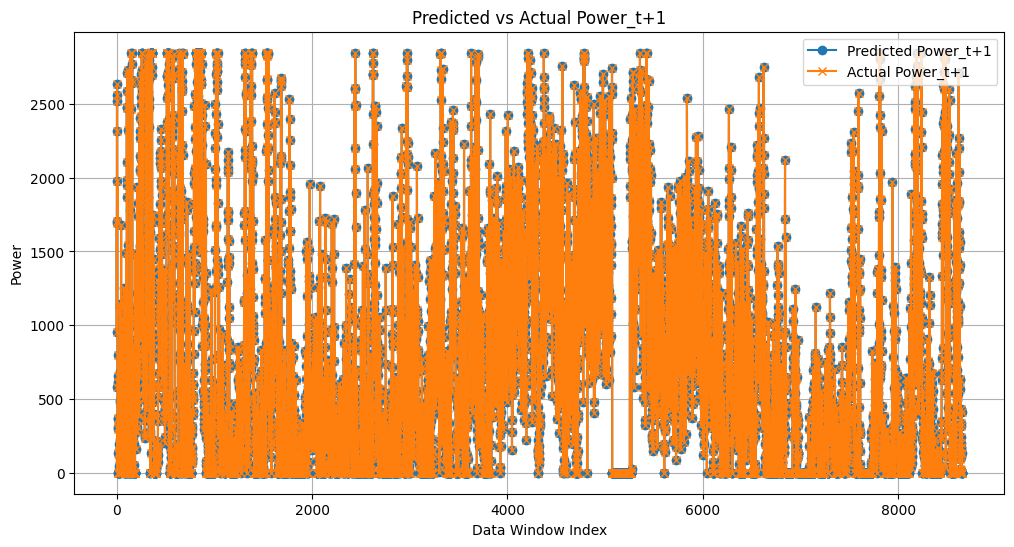

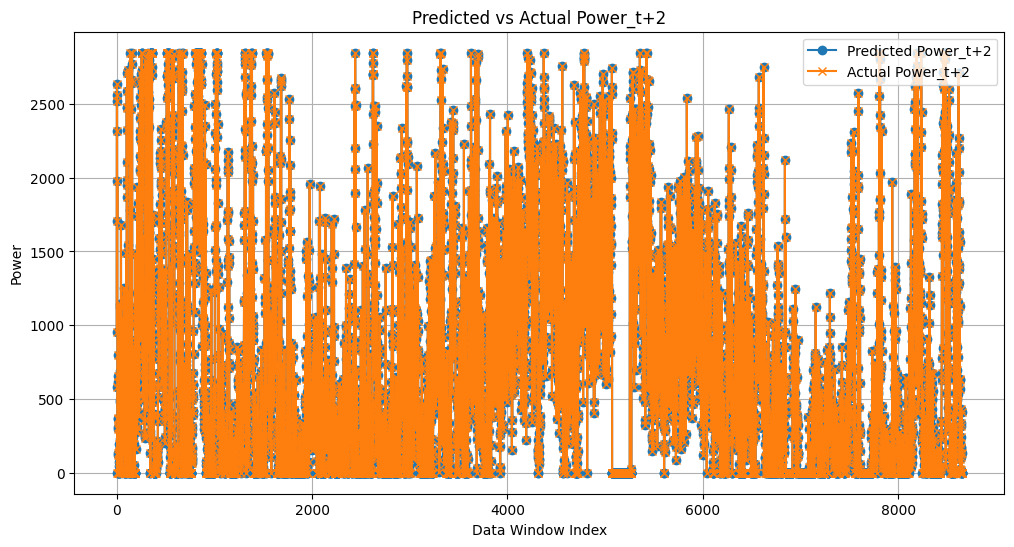

In [9]:
import matplotlib.pyplot as plt

# Plotting the first set of predicted vs actual data for visual comparison
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Power_t+1'], label='Predicted Power_t+1', marker='o')
plt.plot(comparison_df.index, comparison_df['Actual_Power_t+1'], label='Actual Power_t+1', marker='x')
plt.xlabel('Data Window Index')
plt.ylabel('Power')
plt.title('Predicted vs Actual Power_t+1')
plt.legend()
plt.grid(True)
plt.show()

# Plotting more sets of predicted vs actual data if needed
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Power_t+2'], label='Predicted Power_t+2', marker='o')
plt.plot(comparison_df.index, comparison_df['Actual_Power_t+2'], label='Actual Power_t+2', marker='x')
plt.xlabel('Data Window Index')
plt.ylabel('Power')
plt.title('Predicted vs Actual Power_t+2')
plt.legend()
plt.grid(True)
plt.show()


## DATA WINDOWING

### LINEER REGRESSION İLE DATA WINDOWING TESTING

#### bütün veriler

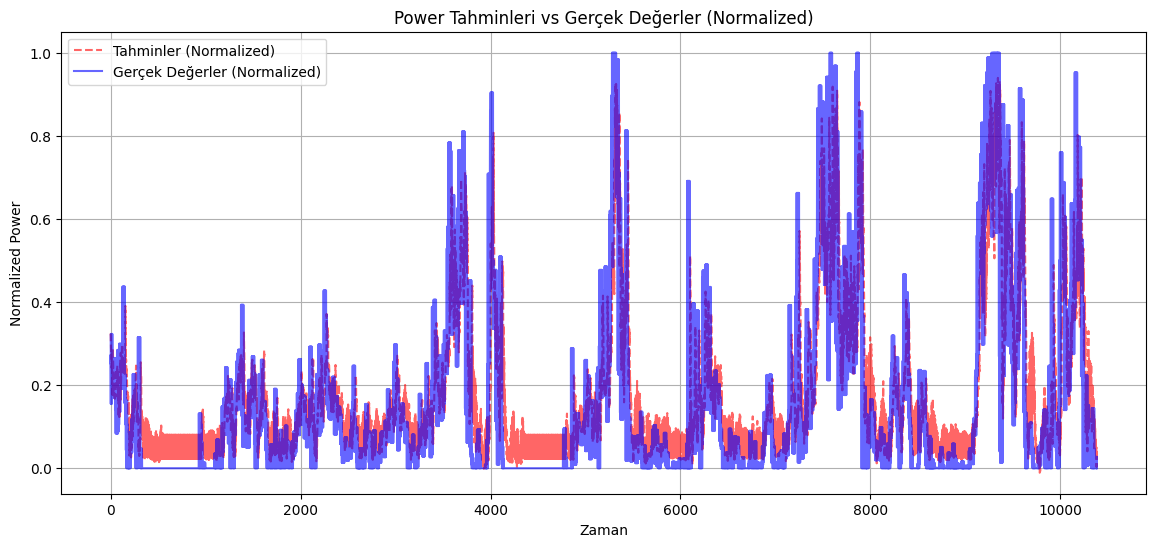

In [40]:
scaler = MinMaxScaler()
table['Power_Normalized'] = scaler.fit_transform(table[['Power']])

# Windowing işlemi
def create_windows(data, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(table['Power_Normalized'].values, window_size, prediction_size)

# Eğitim ve test verilerini ayır
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized, train_labels_normalized = windows_normalized[:train_size], labels_normalized[:train_size]
test_windows_normalized, test_labels_normalized = windows_normalized[train_size:], labels_normalized[train_size:]

# Modeli eğit ve tahmin yap
model = LinearRegression()
model.fit(train_windows_normalized, train_labels_normalized)
predictions_normalized = model.predict(test_windows_normalized)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Tahminler (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='Gerçek Değerler (Normalized)', color='b', alpha=0.6)
plt.title('Power Tahminleri vs Gerçek Değerler (Normalized)')
plt.xlabel('Zaman')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()

#### bütün veriler 0 çıkartılmış

C:\Users\Oğuz\AppData\Local\Temp\ipykernel_16848\3142234913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])


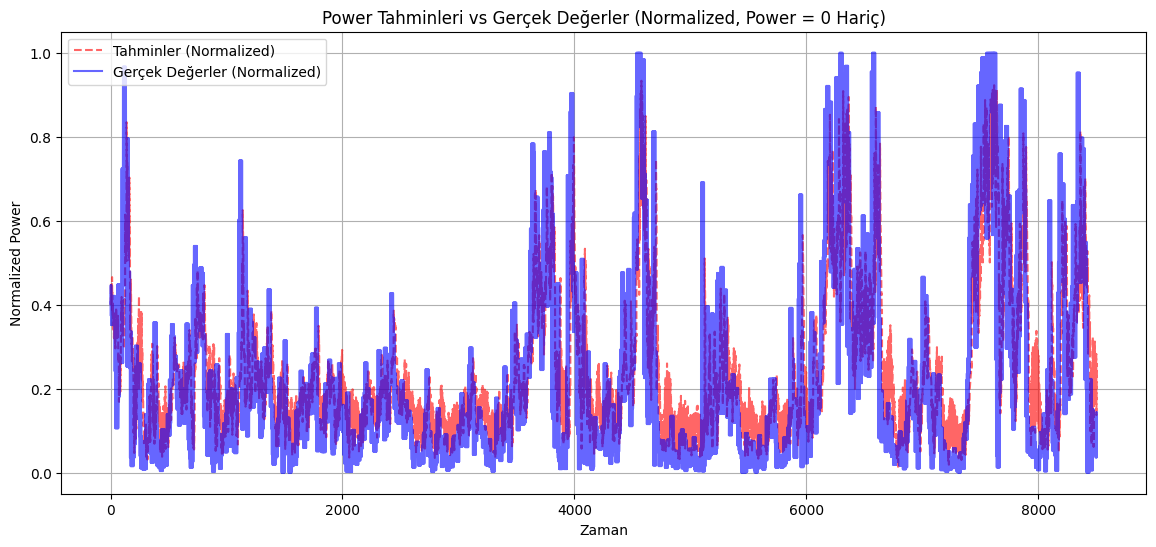

In [41]:
# Power değeri 0 olmayan verileri filtrele
data_filtered = table[table['Power'] != 0]

# Power sütununu normalize et
scaler = MinMaxScaler()
data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])

# Windowing işlemi
def create_windows(data, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered['Power_Normalized'].values, window_size, prediction_size)

# Eğitim ve test verilerini ayır
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized, train_labels_normalized = windows_normalized[:train_size], labels_normalized[:train_size]
test_windows_normalized, test_labels_normalized = windows_normalized[train_size:], labels_normalized[train_size:]

# Modeli eğit ve tahmin yap
model = LinearRegression()
model.fit(train_windows_normalized, train_labels_normalized)
predictions_normalized = model.predict(test_windows_normalized)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Tahminler (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='Gerçek Değerler (Normalized)', color='b', alpha=0.6)
plt.title('Power Tahminleri vs Gerçek Değerler (Normalized, Power = 0 Hariç)')
plt.xlabel('Zaman')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()

#### 0 çıkartılmış ilk 50 veri

C:\Users\Oğuz\AppData\Local\Temp\ipykernel_16848\1138793015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])


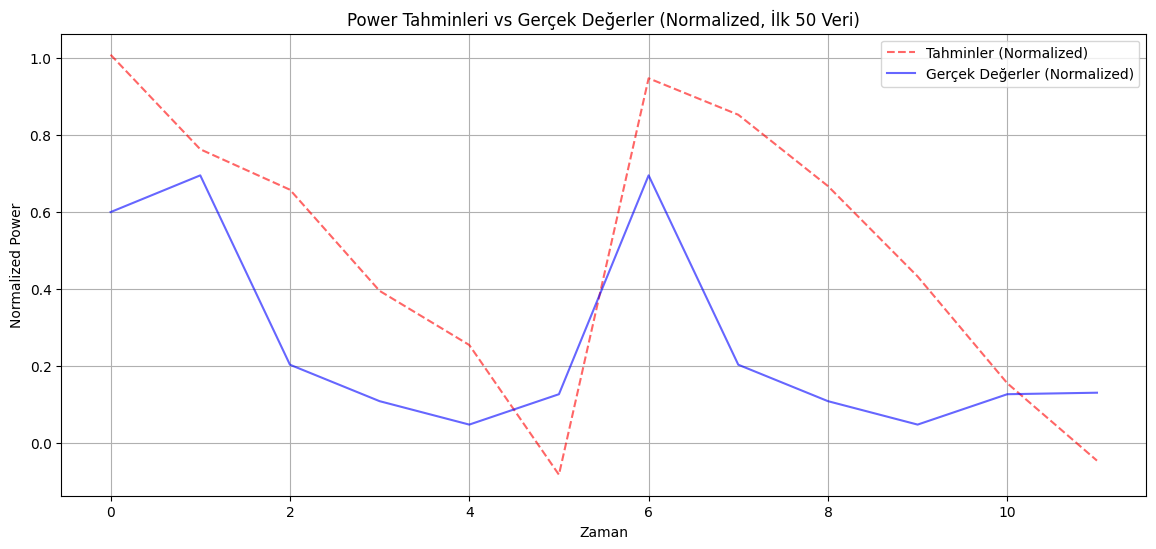

In [42]:
data_filtered = table[table['Power'] != 0]
data_filtered_50 = data_filtered.iloc[:50]
scaler = MinMaxScaler()
window_size, prediction_size = 36, 6

data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])

# Normalize edilmiş Power sütununu kullanarak windowing işlemini tekrar yapalım
windows_normalized_50, labels_normalized_50 = create_windows(data_filtered_50['Power_Normalized'].values, window_size, prediction_size)

# Eğitim ve test verilerini ayıralım (normalize edilmiş veri, ilk 50 veri)
train_size_50 = int(len(windows_normalized_50) * 0.8)
train_windows_normalized_50 = windows_normalized_50[:train_size_50]
train_labels_normalized_50 = labels_normalized_50[:train_size_50]

test_windows_normalized_50 = windows_normalized_50[train_size_50:]
test_labels_normalized_50 = labels_normalized_50[train_size_50:]

# Modeli yeniden eğitelim (normalize edilmiş veri, ilk 50 veri)
model.fit(train_windows_normalized_50, train_labels_normalized_50)

# Test verileri üzerinde tahmin yapalım (normalize edilmiş veri, ilk 50 veri)
predictions_normalized_50 = model.predict(test_windows_normalized_50)

# Normalize edilmiş veriler üzerinde tahminlerin ve gerçek değerlerin görselleştirilmesi (ilk 50 veri)
plt.figure(figsize=(14, 6))

# Tahminler (normalize edilmiş, daha saydam yapıyoruz)
plt.plot(predictions_normalized_50.flatten(), label='Tahminler (Normalized)', linestyle='--', color='r', alpha=0.6)

# Gerçek Değerler (normalize edilmiş, daha saydam yapıyoruz)
plt.plot(test_labels_normalized_50.flatten(), label='Gerçek Değerler (Normalized)', color='b', alpha=0.6)

plt.title('Power Tahminleri vs Gerçek Değerler (Normalized, İlk 50 Veri)')
plt.xlabel('Zaman')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()


### LSTM İLE DATA WINDOWING TESTING

#### 0 KALDIRMADAN ilk 50 veri


In [38]:
scaler = MinMaxScaler()
window_size, prediction_size = 36, 6
if 'Power' in table.columns:
    # Extract the 'Power' column
    data_filtered_50 = table[['Power']]
    # Take the first 50 rows
    data_filtered = data_filtered_50.iloc[:50]
    scaler = MinMaxScaler()

    # Fit and transform the data
    data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered)

C:\Users\Oğuz\AppData\Local\Temp\ipykernel_16848\4026746293.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered)


Epoch 1/360


C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step - loss: 0.6062
Epoch 2/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5962
Epoch 3/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5864
Epoch 4/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5767
Epoch 5/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5672
Epoch 6/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5577
Epoch 7/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5482
Epoch 8/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5386
Epoch 9/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5289
Epoch 10/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.5188
Epoch 11/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5087
Epoch 12/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4980
Epoch 13/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.4866
Epoch 14/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4748
Epoch 15/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4620
Epoch 16/360
1/1 ━━━━━━━━━━━━━

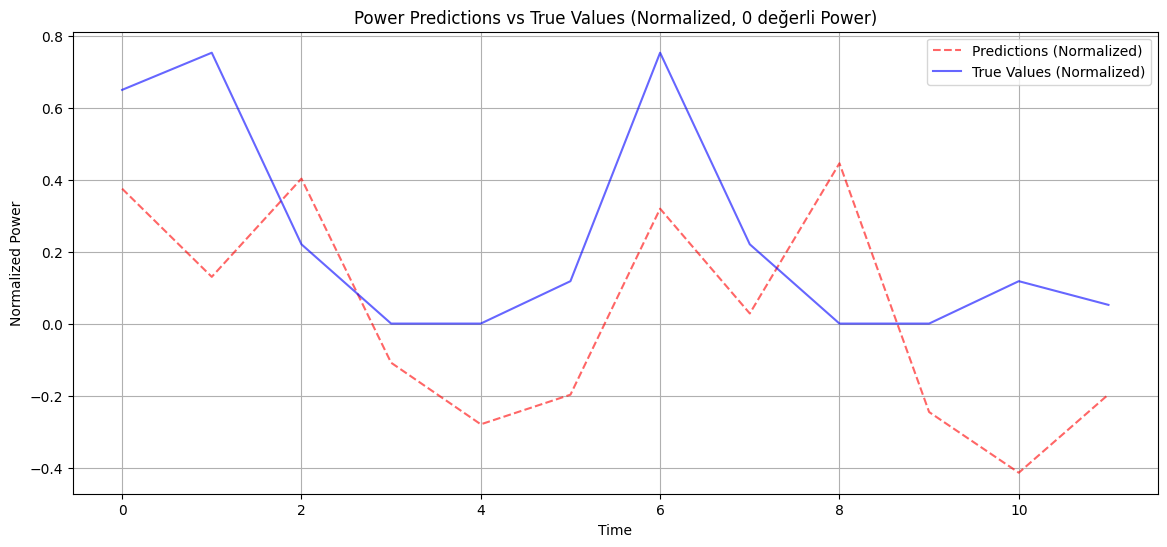

In [39]:
def create_windows(data, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered['Power_Normalized'].values, window_size, prediction_size)
# Split into train and test sets
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized = windows_normalized[:train_size]
train_labels_normalized = labels_normalized[:train_size]
test_windows_normalized = windows_normalized[train_size:]
test_labels_normalized = labels_normalized[train_size:]

# 4. Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(prediction_size))
model.compile(optimizer='adam', loss='mse')

# Reshape the data for LSTM
train_windows_normalized = train_windows_normalized.reshape((train_windows_normalized.shape[0], train_windows_normalized.shape[1], 1))
test_windows_normalized = test_windows_normalized.reshape((test_windows_normalized.shape[0], test_windows_normalized.shape[1], 1))

model.fit(train_windows_normalized, train_labels_normalized, epochs=360, verbose=1)

# 5. Make predictions
predictions_normalized = model.predict(test_windows_normalized)

plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Predictions (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='True Values (Normalized)', color='b', alpha=0.6)
plt.title('Power Predictions vs True Values (Normalized, 0 değerli Power)')
plt.xlabel('Time')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()

#### 0 KALDIRMA ilk 50 veri


In [33]:
data_filtered = table[table['Power'] != 0]
data_filtered = data_filtered.iloc[:50]
scaler = MinMaxScaler()
window_size, prediction_size = 36, 6

data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])

In [34]:
def create_windows(data, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered['Power_Normalized'].values, window_size, prediction_size)

In [35]:
# Split into train and test sets
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized = windows_normalized[:train_size]
train_labels_normalized = labels_normalized[:train_size]
test_windows_normalized = windows_normalized[train_size:]
test_labels_normalized = labels_normalized[train_size:]

# 4. Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(prediction_size))
model.compile(optimizer='adam', loss='mse')

C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# Reshape the data for LSTM
train_windows_normalized = train_windows_normalized.reshape((train_windows_normalized.shape[0], train_windows_normalized.shape[1], 1))
test_windows_normalized = test_windows_normalized.reshape((test_windows_normalized.shape[0], test_windows_normalized.shape[1], 1))

model.fit(train_windows_normalized, train_labels_normalized, epochs=360, verbose=1)

# 5. Make predictions
predictions_normalized = model.predict(test_windows_normalized)

Epoch 1/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step - loss: 0.5963
Epoch 2/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5852
Epoch 3/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5735
Epoch 4/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5614
Epoch 5/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5489
Epoch 6/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5362
Epoch 7/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5230
Epoch 8/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5093
Epoch 9/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4950
Epoch 10/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4801
Epoch 11/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4645
Epoch 12/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4481
Epoch 13/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4308
Epoch 14/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4122
Epoch 15/360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3921
Epoch 16/360
1/1 ━

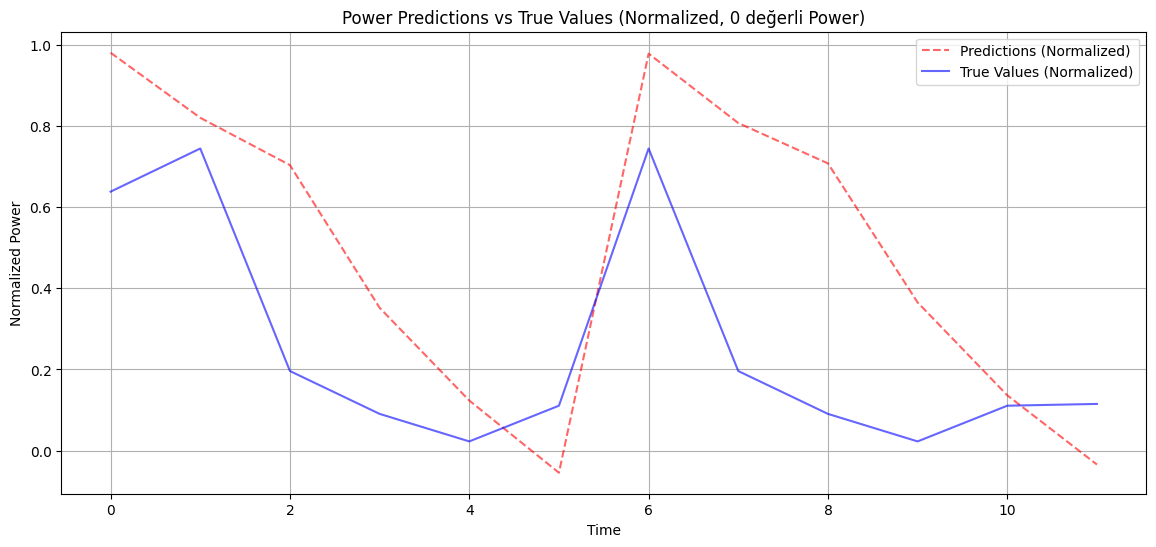

In [37]:
plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Predictions (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='True Values (Normalized)', color='b', alpha=0.6)
plt.title('Power Predictions vs True Values (Normalized, 0 değerli Power)')
plt.xlabel('Time')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()

#### 0 ÇIKARTILMIŞ BÜTÜN VERİLER

In [43]:
data_filtered = table[table['Power'] != 0]
scaler = MinMaxScaler()
window_size, prediction_size = 36, 6

data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])

C:\Users\Oğuz\AppData\Local\Temp\ipykernel_16848\3478673772.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Power_Normalized'] = scaler.fit_transform(data_filtered[['Power']])


Epoch 1/360


C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0842
Epoch 2/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0409
Epoch 3/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0364
Epoch 4/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0371
Epoch 5/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0359
Epoch 6/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0361
Epoch 7/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0340
Epoch 8/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0353
Epoch 9/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0353
Epoch 10/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0346
Epoch 11/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0343
Epoch 12/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0341
Epoch 13/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0334
Epoch 14/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0344
Epoch 15/360
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step -

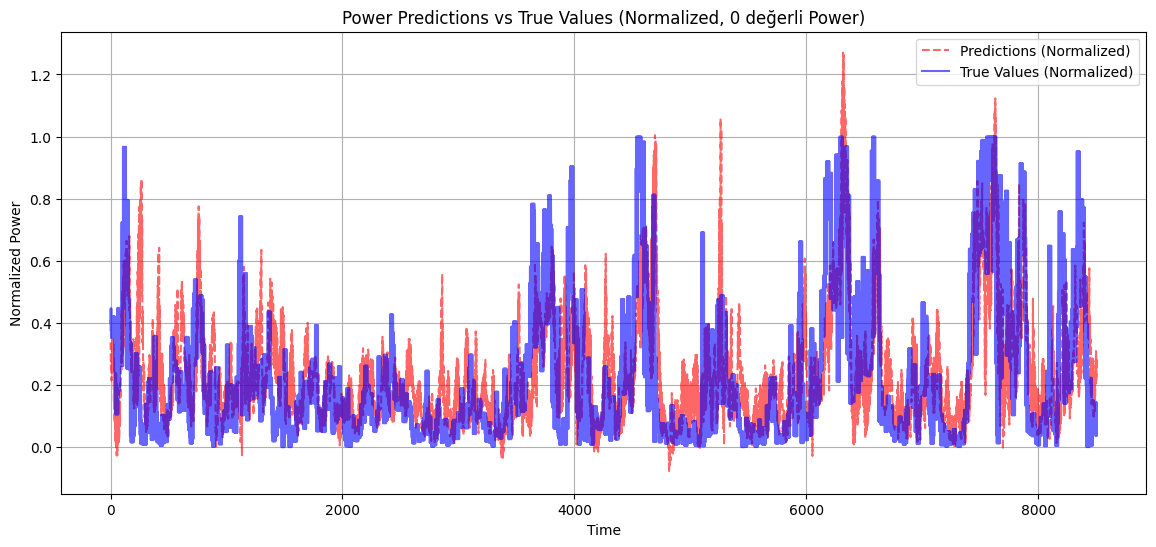

In [44]:
def create_windows(data, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered['Power_Normalized'].values, window_size, prediction_size)
# Split into train and test sets
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized = windows_normalized[:train_size]
train_labels_normalized = labels_normalized[:train_size]
test_windows_normalized = windows_normalized[train_size:]
test_labels_normalized = labels_normalized[train_size:]

# 4. Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(prediction_size))
model.compile(optimizer='adam', loss='mse')

# Reshape the data for LSTM
train_windows_normalized = train_windows_normalized.reshape((train_windows_normalized.shape[0], train_windows_normalized.shape[1], 1))
test_windows_normalized = test_windows_normalized.reshape((test_windows_normalized.shape[0], test_windows_normalized.shape[1], 1))

model.fit(train_windows_normalized, train_labels_normalized, epochs=360, verbose=1)

# 5. Make predictions
predictions_normalized = model.predict(test_windows_normalized)

plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Predictions (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='True Values (Normalized)', color='b', alpha=0.6)
plt.title('Power Predictions vs True Values (Normalized, 0 değerli Power)')
plt.xlabel('Time')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()

### LSTM TESTLERİ 

Epoch 1/380


C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step - loss: 0.7404
Epoch 2/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6811
Epoch 3/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6255
Epoch 4/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5726
Epoch 5/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5218
Epoch 6/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4720
Epoch 7/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4230
Epoch 8/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3742
Epoch 9/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3209
Epoch 10/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2644
Epoch 11/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2092
Epoch 12/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1669
Epoch 13/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1816
Epoch 14/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2137
Epoch 15/380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1854
Epoch 16/380
1/1 ━━━━━━━━━━━━━

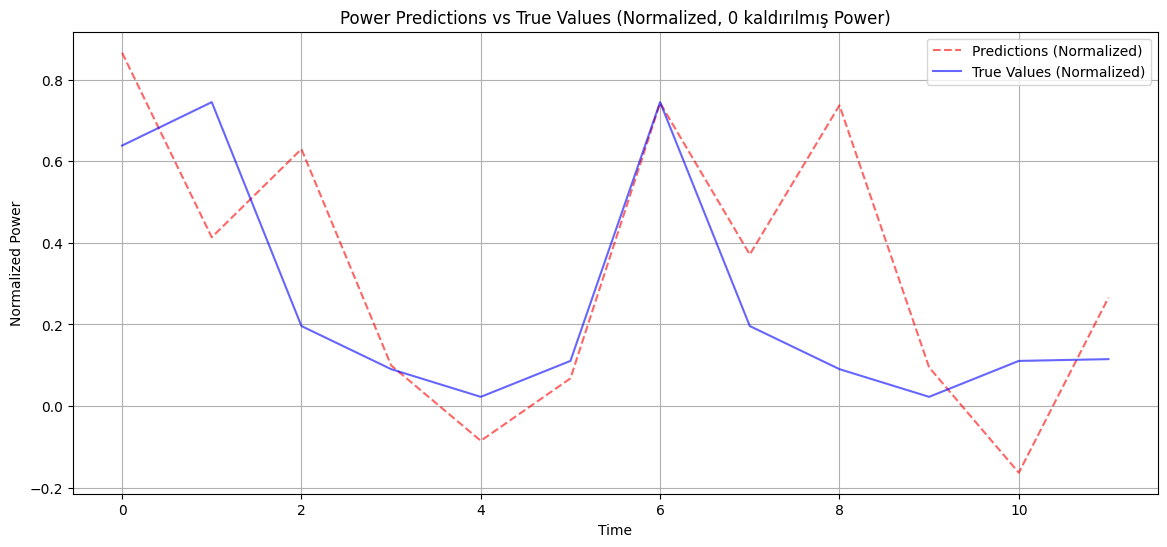

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Veriyi yükle ve Power değeri 0 olmayanları filtrele

data_filtered = table[table['Power'] != 0]

# 2. İlk 50 veriyi seç
data_filtered = data_filtered.iloc[:50]

# 3. Power sütununu normalize et ve hedef değişken olarak ayır
scaler_power = MinMaxScaler()
data_filtered['Power_Normalized'] = scaler_power.fit_transform(data_filtered[['Power']])

# 4. Diğer özellikleri normalize et
feature_columns = ['WindSpeed',  'PitchAngle' , 'XComp', 'YComp', 
                   'WindSpeedlag1', 'WindSpeedlag3', 'Powerlag1', 'Powerlag3', 'XCompLag1', 
                   'XCompLag3', 'YCompLag1', 'YCompLag3', 'Month_sin', 'Month_cos', 'Hour_sin', 
                   'Hour_cos', 'Day_sin', 'Day_cos', 'WindSpeedCube']
scaler_features = MinMaxScaler()
data_filtered[feature_columns] = scaler_features.fit_transform(data_filtered[feature_columns])

# Windowing işlemi
def create_windows(data, target, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(target[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered[feature_columns].values, data_filtered['Power_Normalized'].values, window_size, prediction_size)

# Eğitim ve test verilerini ayır
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized = windows_normalized[:train_size]
train_labels_normalized = labels_normalized[:train_size]
test_windows_normalized = windows_normalized[train_size:]
test_labels_normalized = labels_normalized[train_size:]

# 4. Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, len(feature_columns))))
model.add(Dense(prediction_size))
model.compile(optimizer='adam', loss='mse')

# Reshape the data for LSTM
train_windows_normalized = train_windows_normalized.reshape((train_windows_normalized.shape[0], train_windows_normalized.shape[1], len(feature_columns)))
test_windows_normalized = test_windows_normalized.reshape((test_windows_normalized.shape[0], test_windows_normalized.shape[1], len(feature_columns)))

model.fit(train_windows_normalized, train_labels_normalized, epochs=380, verbose=1)

# 5. Make predictions
predictions_normalized = model.predict(test_windows_normalized)

plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Predictions (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='True Values (Normalized)', color='b', alpha=0.6)
plt.title('Power Predictions vs True Values (Normalized, 0 kaldırılmış Power)')
plt.xlabel('Time')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/200


C:\Users\Oğuz\AppData\Local\Temp\ipykernel_8600\1469381633.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Power_Normalized'] = scaler_power.fit_transform(data_filtered[['Power']])
C:\Users\Oğuz\AppData\Local\Temp\ipykernel_8600\1469381633.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature_columns] = scaler_features.fit_transform(data_filtered[feature_columns])
C:\Users\Oğuz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local

142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0598 - val_loss: 0.0325
Epoch 2/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0383 - val_loss: 0.0321
Epoch 3/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0361 - val_loss: 0.0262
Epoch 4/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0349 - val_loss: 0.0262
Epoch 5/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0332 - val_loss: 0.0301
Epoch 6/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0341 - val_loss: 0.0316
Epoch 7/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0321 - val_loss: 0.0254
Epoch 8/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0325 - val_loss: 0.0252
Epoch 9/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0320 - val_loss: 0.0292
Epoch 10/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0313 - val_loss: 0.0242
Epoch 11/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0316 - val_loss: 0.0240
Epoch 12/200
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

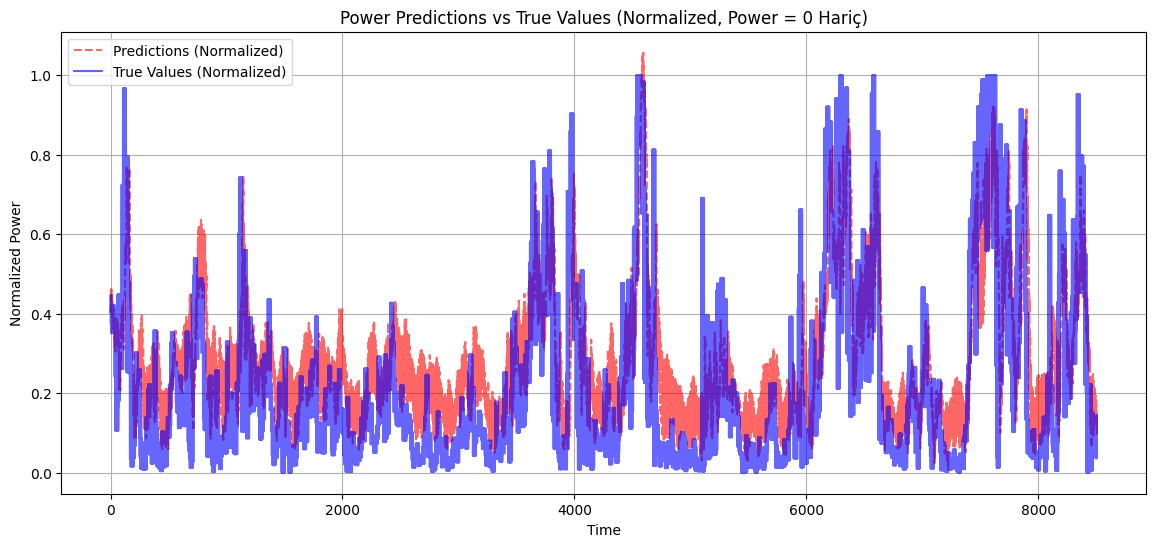

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Power değeri 0 olmayan verileri filtrele
data_filtered = table[table['Power'] != 0]

# Tüm feature_columns listesi
feature_columns = ['WindSpeed',  'PitchAngle',  'XComp', 'YComp', 
                   'WindSpeedlag1', 'WindSpeedlag3', 'Powerlag1', 'Powerlag3', 'XCompLag1', 
                   'XCompLag3', 'YCompLag1', 'YCompLag3', 'Month_sin', 'Month_cos', 'Hour_sin', 
                   'Hour_cos', 'Day_sin', 'Day_cos', 'WindSpeedCube',]

# Power sütununu normalize et
scaler_power = MinMaxScaler()
data_filtered['Power_Normalized'] = scaler_power.fit_transform(data_filtered[['Power']])

# Diğer özellikleri normalize et
scaler_features = MinMaxScaler()
data_filtered[feature_columns] = scaler_features.fit_transform(data_filtered[feature_columns])

# Windowing işlemi
def create_windows(data, target, window_size, prediction_size):
    windows, labels = [], []
    for i in range(len(data) - window_size - prediction_size):
        windows.append(data[i:i + window_size])
        labels.append(target[i + window_size:i + window_size + prediction_size])
    return np.array(windows), np.array(labels)

window_size, prediction_size = 36, 6
windows_normalized, labels_normalized = create_windows(data_filtered[feature_columns].values, data_filtered['Power_Normalized'].values, window_size, prediction_size)

# Eğitim ve test verilerini ayır
train_size = int(len(windows_normalized) * 0.8)
train_windows_normalized = windows_normalized[:train_size]
train_labels_normalized = labels_normalized[:train_size]
test_windows_normalized = windows_normalized[train_size:]
test_labels_normalized = labels_normalized[train_size:]

# Modeli oluştur ve eğit
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, len(feature_columns))))
model.add(Dense(prediction_size))
model.compile(optimizer='adam', loss='mse')

# Veriyi LSTM için yeniden şekillendir
train_windows_normalized = train_windows_normalized.reshape((train_windows_normalized.shape[0], train_windows_normalized.shape[1], len(feature_columns)))
test_windows_normalized = test_windows_normalized.reshape((test_windows_normalized.shape[0], test_windows_normalized.shape[1], len(feature_columns)))

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli eğit
history = model.fit(train_windows_normalized, train_labels_normalized, epochs=200, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Tahmin yap
predictions_normalized = model.predict(test_windows_normalized)

# Tahminlerin ve gerçek değerlerin görselleştirilmesi
plt.figure(figsize=(14, 6))
plt.plot(predictions_normalized.flatten(), label='Predictions (Normalized)', linestyle='--', color='r', alpha=0.6)
plt.plot(test_labels_normalized.flatten(), label='True Values (Normalized)', color='b', alpha=0.6)
plt.title('Power Predictions vs True Values (Normalized, Power = 0 Hariç)')
plt.xlabel('Time')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()


## UNKOWN

In [29]:
for i in columnss.columns:
    datalar = table[i]
    q1 = np.percentile(datalar,25)
    q2 = np.percentile(datalar,50)
    q3 = np.percentile(datalar,75)
    IQR = q3 - q1
    uplimit = q3 + 1.5*IQR
    lowlimit = q1 - 1.5*IQR
    table.loc[table[i] > uplimit, i] = uplimit
    table.loc[table[i] < lowlimit, i] = lowlimit

C:\Users\Oğuz\AppData\Local\Temp\ipykernel_13784\1338787199.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


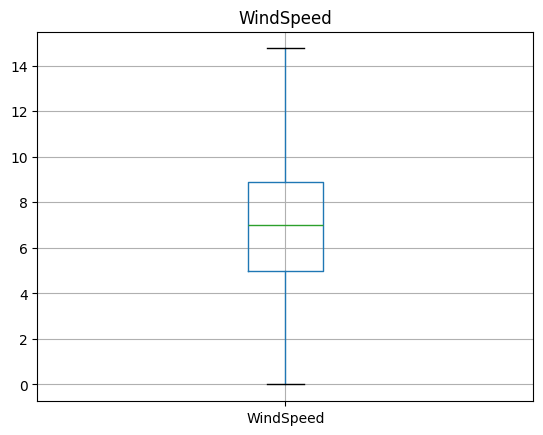

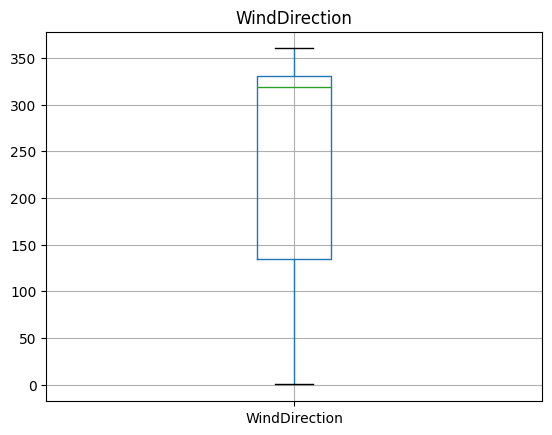

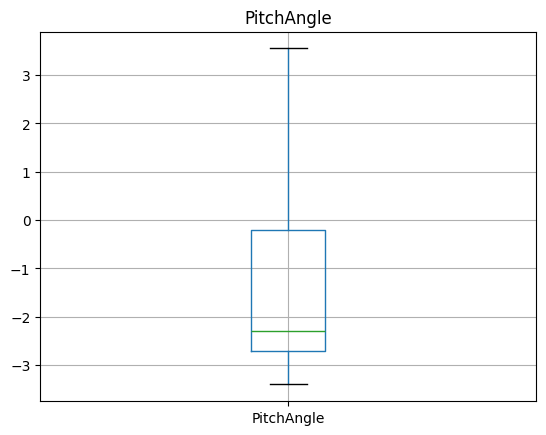

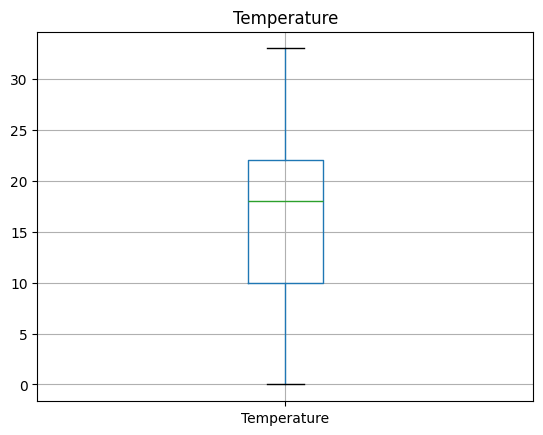

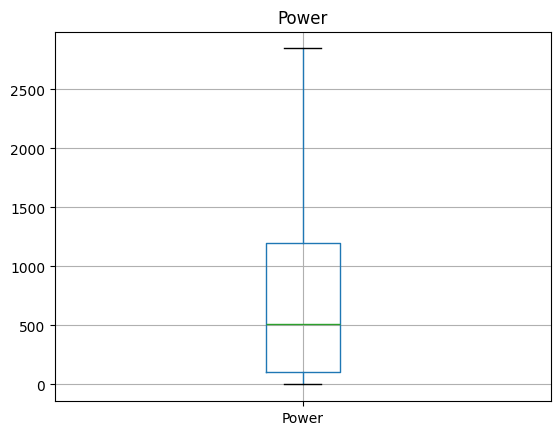

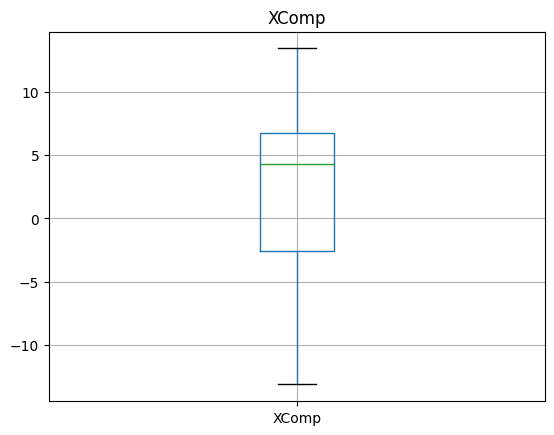

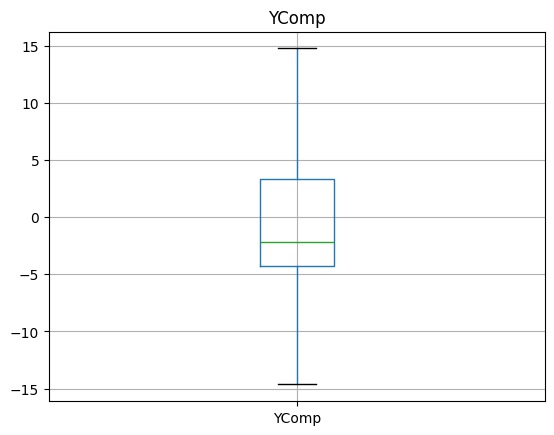

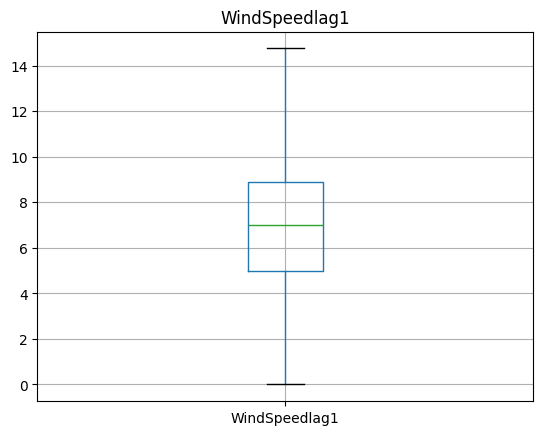

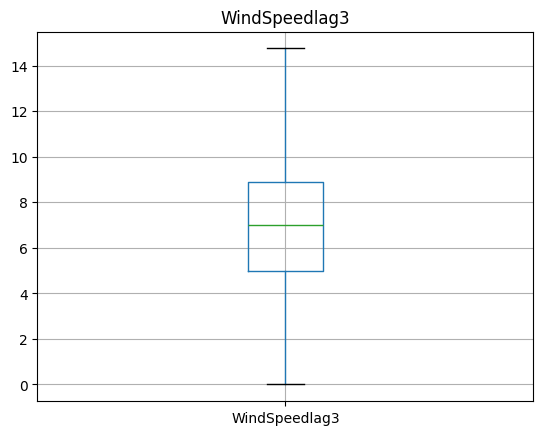

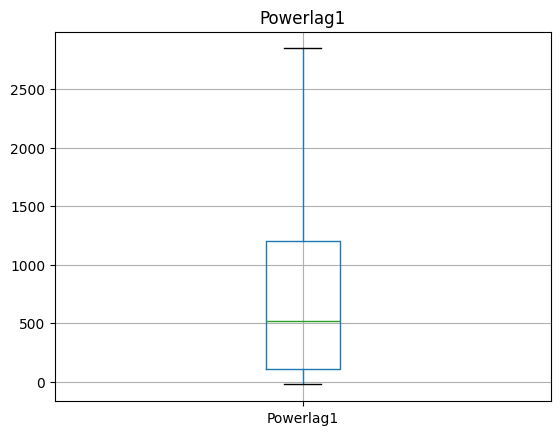

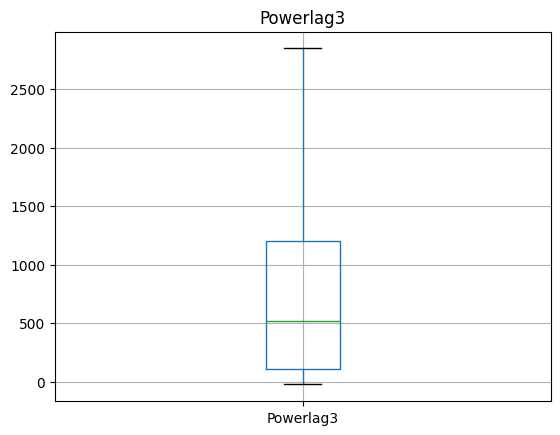

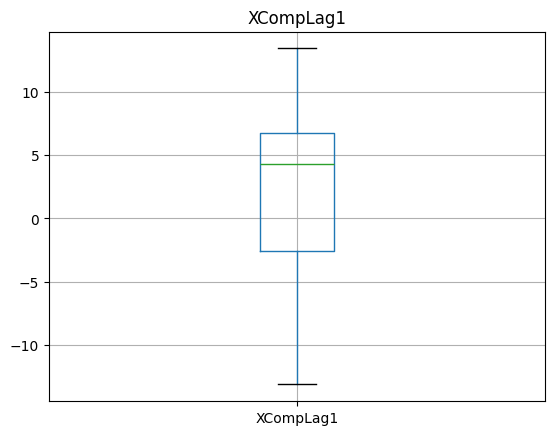

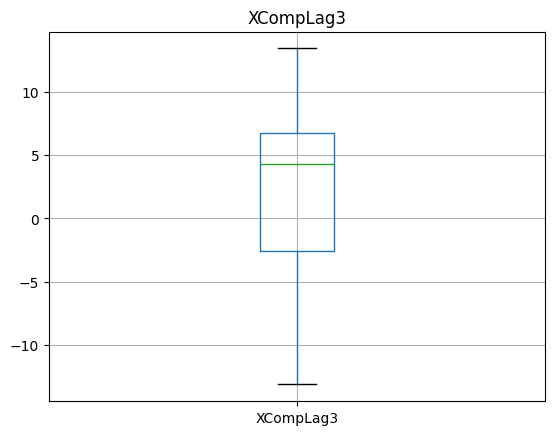

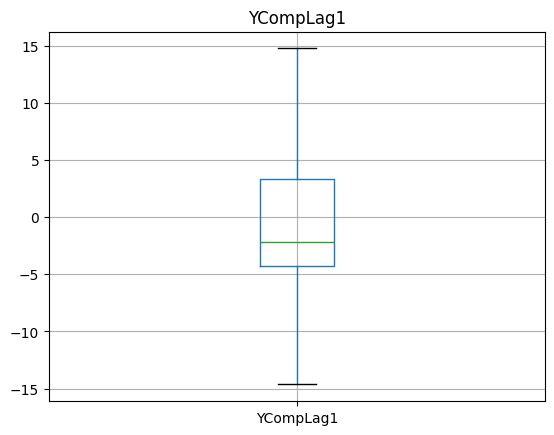

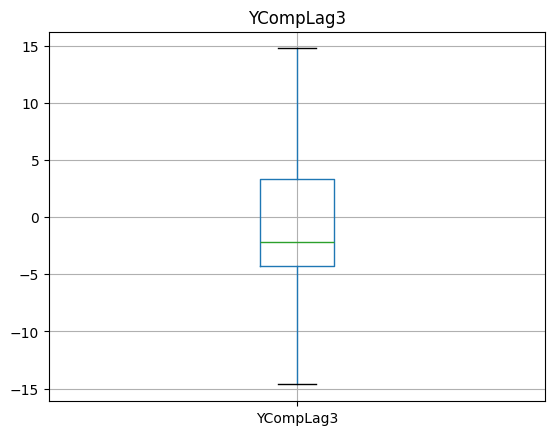

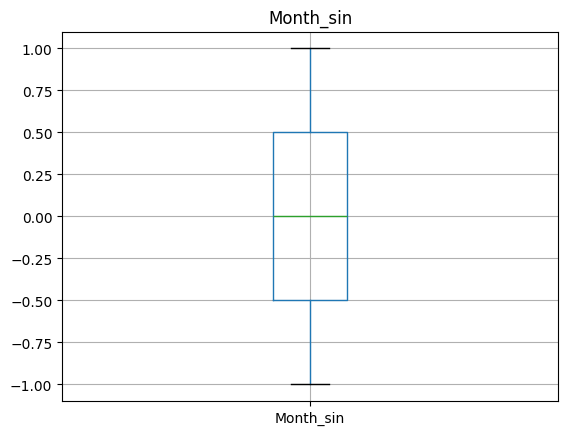

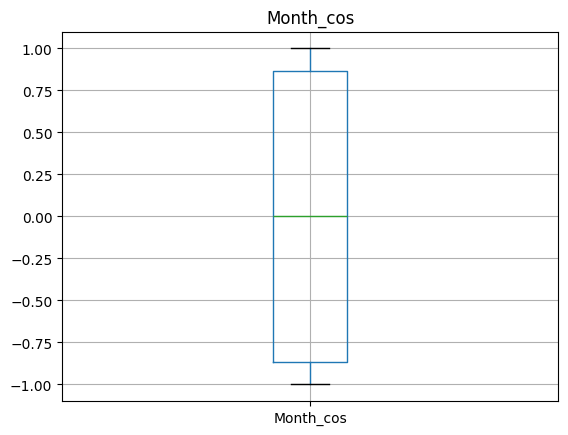

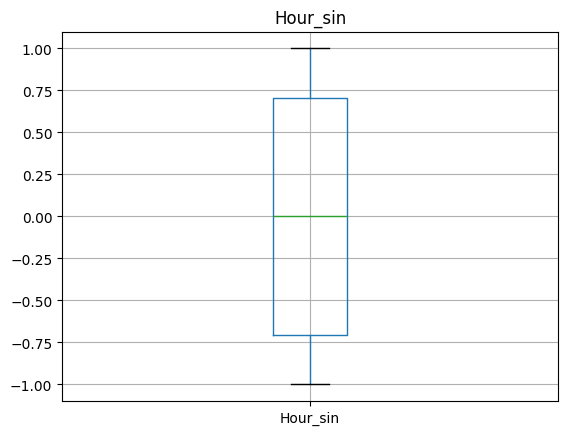

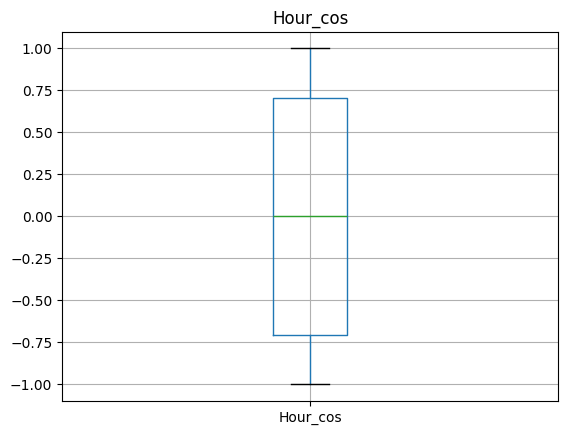

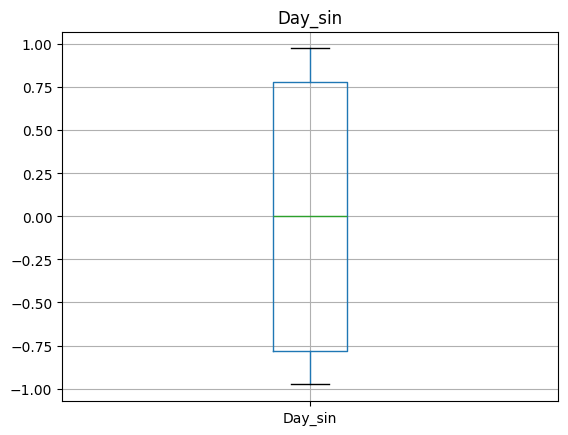

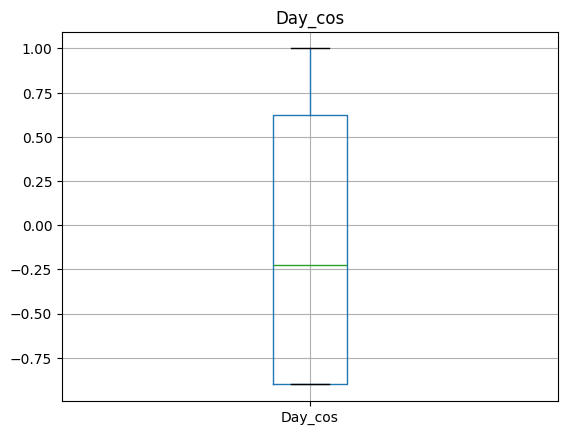

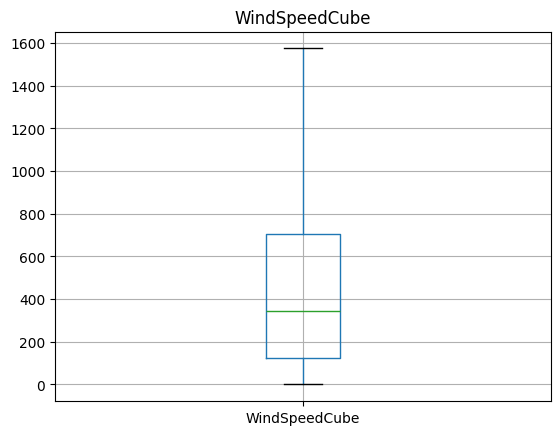

In [30]:
columnss = table.select_dtypes(include=['float64'])
for column in table:
    if column in columnss:
        plt.figure()
        plt.gca().set_title(column)
        table.boxplot([column])